In this notebook i will compare calibration results from two sphere wideband calibrations. And the results after ebing process with EK80 and Echoview.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sphere_ts

%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

# 200 kHz calibration

In [3]:
EV_200_22_f = [185000,186000,187000,188000,189000,190000,191000,192000,193000,194000,206000,207000,208000,209000,210000,211000,212000,213000,214000,215000,216000,217000,218000,219000,220000,221000,222000,223000,224000,239000,240000,241000,242000,243000,244000,245000,246000,247000,248000,249000,250000,251000,252000,253000,254000,255000]
EV_200_22_g = [25.8971,26.2426,26.3704,26.0357,26.0393,26.3371,26.2771,26.0265,26.1403,26.3191,26.6342,26.7078,26.6875,26.7289,26.837,26.9181,27.0007,27.0702,27.0726,27.1333,27.2699,27.3188,27.2477,27.3311,27.5347,27.53,27.1505,26.9075,27.0922,27.6456,27.6829,27.6419,27.5869,27.53,27.41,27.2943,27.3845,27.5879,27.6733,27.625,27.624,27.6799,27.609,27.4978,27.6086,27.7006]
EV_200_38_f = [185000,186000,187000,188000,189000,190000,191000,192000,193000,194000,195000,196000,197000,198000,199000,200000,201000,202000,203000,204000,231000,232000,233000,234000,235000,236000,237000,238000,239000]
EV_200_38_g = [26.5625,26.5738,26.5995,26.5142,26.4495,26.4573,26.4264,26.3552,26.3548,26.4234,26.4614,26.4619,26.4955,26.5472,26.5366,26.4919,26.5372,26.6099,26.572,26.563,27.7309,27.7626,27.8137,27.7617,27.73,27.7769,27.7264,27.4709,27.4232]

EK_200_22_f = [185000,185980,186961,187942,188923,189904,190885,191866,192847,193828,194809,195790,205600,206581,207562,208543,209524,210505,211486,212467,213448,214429,215410,216391,217372,218353,219334,220315,221296,222277,223258,224239,225220,238953,239934,240915,241896,242877,243858,244839,245820,246801,247782,248763,249744,250725,251706,252687,253668,254649,255000]
EK_200_22_g = [26.21,26.21,26,26.31,26.21,26.42,26.47,26.43,26.61,26.48,26.66,26.54,27.39,27.67,27.61,27.67,27.91,27.9,28.03,28.19,28.34,28.3,28.44,28.7,28.62,28.72,28.94,28.96,29.03,28.73,28.23,28.91,29.11,29.66,29.71,29.72,29.7,29.7,29.56,29.49,29.63,29.88,30.05,30.05,30.06,30.04,30.03,30.13,30,30.09,30.13]
EK_200_38_f = [185000,185980,186961,187942,188923,189904,190885,191866,192847,193828,194809,195790,196771,197752,198733,199714,200695,201676,202657,203638,204619,230125,231106,232087,233068,234049,235030,236011,236991,237972,238953,239934]
EK_200_38_g = [26.67,26.58,26.62,26.71,26.7,26.67,26.63,26.65,26.68,26.74,26.83,26.9,27.02,27.11,27.25,27.33,27.31,27.47,27.46,27.58,27.69,29.81,29.73,29.67,29.79,29.81,29.81,29.77,29.72,29.73,29.64,29.64]

Text(0.5, 0, 'Frequency (Hz)')

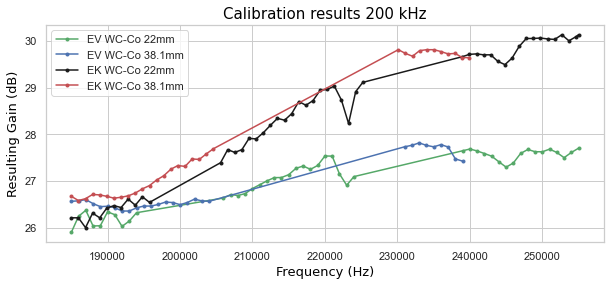

In [4]:
plt.figure(figsize=(10,4))
plt.plot(EV_200_22_f,EV_200_22_g, 'g.-', label='EV WC-Co 22mm')
plt.plot(EV_200_38_f,EV_200_38_g, 'b.-', label='EV WC-Co 38.1mm')
plt.plot(EK_200_22_f,EK_200_22_g, 'k.-', label='EK WC-Co 22mm')
plt.plot(EK_200_38_f,EK_200_38_g, 'r.-', label='EK WC-Co 38.1mm')
plt.legend()
plt.title('Calibration results 200 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

Spheres agreement is acceptable. Which calibration is better Echoview or EK80? What is up with the discrepancy... 

# 120 kHz Calibration

In [5]:
EV_120_22_f = [90000,91000,92000,93000,94000,95000,96000,97000,98000,99000,100000,101000,102000,103000,104000,105000,106000,107000,108000,109000,110000,111000,112000,113000,114000,115000,116000,117000,118000,119000,120000,121000,122000,123000,124000,125000,126000,127000,128000,129000,130000,131000,132000,133000,134000,135000,136000,137000,138000,139000,140000,141000,142000,143000,144000,145000,146000,147000,148000,149000,150000]
EV_120_22_g = [23.6037,24.0458,25.0231,26.1107,26.8926,27.4944,27.8998,28.0216,27.9251,27.8165,27.8556,27.9624,27.9743,27.863,27.7353,27.6883,27.6814,27.6539,27.653,27.6604,27.5707,27.4446,27.3728,27.2807,27.1092,26.9986,27.0043,26.9021,26.7715,26.8067,26.8512,26.705,26.5202,26.5646,26.621,26.5698,26.5832,26.7396,26.8222,26.8084,26.8739,27.0414,27.121,27.0894,27.135,27.3429,27.4924,27.4725,27.3717,27.4674,27.6675,27.7152,27.5887,27.5127,27.6828,27.8236,27.7382,27.6158,27.5841,27.5515,27.4857]
EV_120_38_f = [101000,102000,103000,104000,105000,106000,107000,108000,109000,121000,122000,123000,124000,125000,126000,127000,128000,129000,146000,147000,148000,149000,150000,151000,152000,153000,154000,155000,156000,157000,158000,159000,160000,161000]
EV_120_38_g = [28.1006,28.05,27.8862,27.7535,27.7105,27.6982,27.7218,27.8237,27.848,26.6243,26.6058,26.4878,26.5357,26.7436,26.7769,26.6473,26.7749,27.0161,27.8409,27.6225,27.5451,27.625,27.6852,27.7167,27.806,27.786,27.5989,27.4459,27.4081,27.3954,27.3823,27.4258,27.5086,27.5371]

EK_120_22_f = [90000,90480,90960,91441,91921,92402,92882,93363,93843,94324,94804,95285,95765,96246,96726,97207,97687,98168,98648,99129,99609,100090,100570,101051,101531,102012,102492,102972,103453,103933,104414,104894,105375,105855,106336,106816,107297,107777,108258,108738,109219,109699,110180,110660,111141,111621,112102,112582,113063,113543,114024,114504,114984,115465,115945,116426,116906,117387,117867,118348,118828,119309,119789,120270,120750,121231,121711,122192,122672,123153,123633,124114,124594,125075,125555,126036,126516,126996,127477,127957,128438,128918,129399,129879,130360,130840,131321,131801,132282,132762,133243,133723,134204,134684,135165,135645,136126,136606,137087,137567,138048,138528,139009,139489,139969,140450,140930,141411,141891,142372,142852,143333,143813,144294,144774,145255,145735,146216,146696,147177,147657,148138,148618,149099,149579,150060,150540,151021,151501,151981]
EK_120_22_g = [20.77,21.36,21.91,22.36,22.78,23.28,23.83,24.36,24.8,25.21,25.54,25.84,26.05,26.21,26.3,26.34,26.34,26.34,26.33,26.32,26.36,26.44,26.55,26.64,26.7,26.7,26.68,26.66,26.65,26.65,26.64,26.62,26.62,26.67,26.73,26.77,26.78,26.78,26.82,26.87,26.92,26.9,26.87,26.85,26.86,26.9,26.9,26.85,26.78,26.77,26.81,26.86,26.87,26.83,26.78,26.79,26.85,26.92,26.94,26.94,26.92,26.94,26.99,27.07,27.11,27.09,27,26.91,26.89,26.96,27.07,27.15,27.2,27.18,27.14,27.16,27.25,27.39,27.52,27.6,27.6,27.57,27.56,27.61,27.73,27.88,28,28.08,28.09,28.07,28.05,28.08,28.2,28.37,28.53,28.63,28.7,28.71,28.7,28.69,28.71,28.8,28.93,29.07,29.18,29.25,29.28,29.28,29.29,29.29,29.31,29.36,29.45,29.56,29.68,29.74,29.76,29.74,29.71,29.7,29.69,29.67,29.66,29.68,29.71,29.74,29.77,29.82,29.88,29.93]
EK_120_38_f = [100090,100570,101051,101531,102012,102492,102972,103453,103933,104414,104894,105375,105855,106336,106816,107297,107777,108258,108738,109219,109699,118348,118828,119309,119789,120270,120750,121231,121711,122192,122672,123153,123633,124114,124594,125075,125555,126036,126516,126996,127477,127957,128438,128918,129399,129879,143333,143813,144294,144774,145255,145735,146216,146696,147177,147657,148138,148618,149099,149579,150060,150540,151021,151501,151981,152462,152942,153423,153903,154384,154864,155345,155825,156306,156786,157267,157747,158228,158708,159189,159669,160150,160630,161111,161591,162072,162552]
EK_120_38_g = [26.56,26.66,26.75,26.78,26.75,26.69,26.65,26.63,26.63,26.6,26.56,26.55,26.62,26.73,26.82,26.83,26.82,26.89,27.01,27.1,27.07,26.62,26.58,26.68,26.74,26.73,26.66,26.65,26.65,26.63,26.57,26.63,26.82,27.03,27.13,27.07,26.99,27.12,27.33,27.48,27.54,27.59,27.64,27.68,27.67,27.63,29.27,29.45,29.59,29.65,29.64,29.59,29.55,29.51,29.47,29.42,29.38,29.37,29.42,29.47,29.54,29.61,29.69,29.76,29.81,29.82,29.8,29.78,29.78,29.78,29.8,29.78,29.78,29.81,29.83,29.87,29.9,29.94,29.99,30.04,30.09,30.14,30.17,30.2,30.19,30.19,30.18]

Text(0.5, 0, 'Frequency (Hz)')

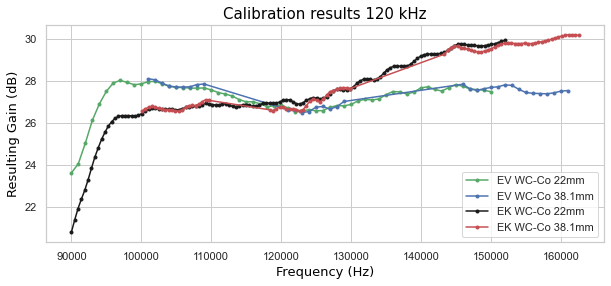

In [6]:
plt.figure(figsize=(10,4))
plt.plot(EV_120_22_f,EV_120_22_g, 'g.-', label='EV WC-Co 22mm')
plt.plot(EV_120_38_f,EV_120_38_g, 'b.-', label='EV WC-Co 38.1mm')
plt.plot(EK_120_22_f,EK_120_22_g, 'k.-', label='EK WC-Co 22mm')
plt.plot(EK_120_38_f,EK_120_38_g, 'r.-', label='EK WC-Co 38.1mm')
plt.legend()
plt.title('Calibration results 120 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

Good agreement between spheres. Suspicious slope for frequencies < 97 kHz. We will not use the frequency band 90-97 kHz for analysis with this transducer. 

Which calibration is better Echoview or EK80?

### Let's take a deeper look and compare calibrated TS to theoretical TS


# Assess 200 kHz calibration

### Theoretical response

In [7]:
# sphere_ts : Gavin Macaulay's https://github.com/gavinmacaulay/SphereTS/blob/master/sphere_ts.py
f_start = 185000
f_stop = 255000 #Hz
a = 0.022 #m

sp = 34.76 #PSU
t = -0.462 #degC
p = 2.77 #m or dbar
# Get water properties
c, rho = sphere_ts.water_properties(sp, t, p)

# Get material properties of Tungsten carbide
mat_prop = sphere_ts.material_properties()
WC_Co = mat_prop['Tungsten carbide']

# Doesn't quite work...
#freq_22, ts_22 =sphere_ts.freq_response(f_start, f_stop, a, c, WC_Co['c1'], WC_Co['c2'], rho, WC_Co['rho1'])

In [8]:
# theoretical 22 mm from EK80
ts_22 = [-44.93,-44.94,-44.95,-44.97,-44.98,-44.99,-45.00,-45.01,-45.03,-45.04,-45.05,-45.06,-45.07,-45.09,-45.10,-45.11,-45.12,-45.13,-45.14,-45.15,-45.17,-45.18,-45.19,-45.20,-45.21,-45.22,-45.23,-45.24,-45.25,-45.26,-45.27,-45.29,-45.30,-45.31,-45.32,-45.33,-45.34,-45.35,-45.35,-45.36,-45.37,-45.38,-45.39,-45.40,-45.41,-45.42,-45.43,-45.44,-45.44,-45.45,-45.46,-45.47,-45.48,-45.48,-45.49,-45.50,-45.50,-45.51,-45.52,-45.52,-45.53,-45.54,-45.54,-45.55,-45.56,-45.56,-45.57,-45.57,-45.58,-45.58,-45.59,-45.59,-45.59,-45.60,-45.60,-45.61,-45.61,-45.61,-45.62,-45.62,-45.62,-45.62,-45.63,-45.63,-45.63,-45.63,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.62,-45.62,-45.62,-45.62,-45.61,-45.61,-45.61,-45.60,-45.60,-45.60,-45.59,-45.59,-45.59,-45.58,-45.58,-45.58,-45.57,-45.57,-45.56,-45.56,-45.56,-45.55,-45.55,-45.54,-45.54,-45.54,-45.53,-45.53,-45.52,-45.52,-45.52,-45.51,-45.51,-45.50,-45.50,-45.50,-45.49,-45.49,-45.49,-45.48,-45.48,-45.48,-45.47,-45.47,-45.47,-45.46,-45.46,-45.46,-45.46,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.46,-45.46,-45.46,-45.47,-45.47,-45.48,-45.48,-45.49,-45.50,-45.50,-45.51,-45.52,-45.53,-45.55,-45.56,-45.58,-45.59,-45.61,-45.63,-45.65,-45.68,-45.70,-45.73,-45.76,-45.80,-45.84,-45.88,-45.93,-45.98,-46.04,-46.10,-46.17,-46.25,-46.34,-46.44,-46.56,-46.69,-46.83,-47.00,-47.18,-47.38,-47.60,-47.81,-48.00,-48.10,-48.03,-47.67,-46.98,-46.02,-44.99,-44.07,-43.40,-42.96,-42.73,-42.63,-42.61,-42.64,-42.70,-42.77,-42.84,-42.92,-42.99,-43.06,-43.12,-43.18,-43.24,-43.29,-43.34,-43.38,-43.42,-43.46,-43.50,-43.53,-43.56,-43.59,-43.62,-43.65,-43.67,-43.69,-43.72,-43.74,-43.76,-43.78,-43.79,-43.81,-43.83,-43.84,-43.86,-43.87,-43.89,-43.90,-43.92,-43.93,-43.94,-43.95,-43.97,-43.98,-43.99,-44.00,-44.01,-44.02,-44.04,-44.05,-44.06,-44.07,-44.08,-44.09,-44.10,-44.11,-44.12,-44.13,-44.14,-44.15,-44.16,-44.17,-44.18,-44.19,-44.20,-44.21,-44.22,-44.23,-44.24,-44.25,-44.25,-44.26,-44.27,-44.28,-44.29,-44.30,-44.31,-44.32,-44.33,-44.34,-44.35,-44.36,-44.37,-44.38,-44.40,-44.41,-44.42,-44.43,-44.44,-44.45,-44.46,-44.47,-44.48,-44.49,-44.50,-44.51,-44.52,-44.53,-44.54,-44.56,-44.57,-44.58,-44.59,-44.60,-44.61,-44.62,-44.63,-44.64,-44.66,-44.67,-44.68,-44.69,-44.70,-44.71,-44.73,-44.74,-44.75,-44.76,-44.77,-44.78,-44.80,-44.81,-44.82,-44.83,-44.84,-44.86,-44.87,-44.88,-44.89,-44.90,-44.92,-44.93,-44.94,-44.95,-44.96,-44.98,-44.99,-45.00,-45.01,-45.02,-45.04,-45.05,-45.06,-45.07,-45.08,-45.09,-45.11,-45.12,-45.13,-45.14,-45.15,-45.16,-45.18,-45.19,-45.20,-45.21,-45.22,-45.23,-45.24,-45.26,-45.27,-45.28,-45.29,-45.30,-45.31,-45.32,-45.33,-45.34,-45.35,-45.36,-45.37,-45.38,-45.39,-45.41,-45.42,-45.42,-45.43,-45.44,-45.45,-45.46,-45.47,-45.48,-45.49,-45.50,-45.51,-45.52,-45.53,-45.54,-45.54,-45.55,-45.56,-45.57,-45.58,-45.58,-45.59,-45.60,-45.61,-45.61,-45.62,-45.63,-45.63,-45.64,-45.65,-45.65,-45.66,-45.67,-45.67,-45.68,-45.68,-45.69,-45.69,-45.70,-45.70,-45.71,-45.71,-45.72,-45.72,-45.73,-45.73,-45.74,-45.74,-45.74,-45.75,-45.75,-45.75,-45.76,-45.76,-45.76,-45.76,-45.77,-45.77,-45.77,-45.77,-45.77,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.79,-45.79,-45.79,-45.79,-45.79,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.77,-45.77,-45.77,-45.77,-45.77,-45.77,-45.76,-45.76,-45.76,-45.76,-45.76,-45.75,-45.75,-45.75,-45.75,-45.74,-45.74,-45.74,-45.74,-45.73,-45.73,-45.73,-45.72,-45.72,-45.72,-45.72,-45.71,-45.71,-45.71,-45.70,-45.70,-45.70,-45.70,-45.69,-45.69,-45.69,-45.68,-45.68,-45.68,-45.68,-45.67,-45.67,-45.67,-45.67,-45.66,-45.66,-45.66,-45.66,-45.65,-45.65,-45.65,-45.65,-45.65,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.65,-45.65,-45.65,-45.66,-45.66,-45.66,-45.67,-45.67,-45.67,-45.68,-45.68,-45.69,-45.69,-45.70,-45.71,-45.71,-45.72,-45.73,-45.73,-45.74,-45.75,-45.76,-45.76,-45.77,-45.78,-45.79,-45.80,-45.81,-45.82,-45.83,-45.85,-45.86,-45.87,-45.88,-45.90,-45.91,-45.92,-45.94,-45.95,-45.97,-45.99,-46.00,-46.02,-46.04,-46.06,-46.08,-46.10,-46.12,-46.14,-46.16,-46.18,-46.21,-46.23,-46.25,-46.28,-46.31,-46.33,-46.36,-46.39,-46.42,-46.45,-46.48,-46.52,-46.55,-46.59,-46.62,-46.66,-46.70,-46.74,-46.78,-46.83,-46.87,-46.92,-46.97,-47.02,-47.07,-47.12,-47.18,-47.24,-47.30,-47.36,-47.42,-47.49,-47.56,-47.63,-47.71,-47.79,-47.87,-47.96,-48.05,-48.14,-48.24,-48.34,-48.45,-48.56,-48.68,-48.80,-48.93,-49.06,-49.21,-49.36,-49.52,-49.69,-49.86,-50.05,-50.25,-50.46,-50.68,-50.92,-51.18,-51.45,-51.74,-52.05,-52.38,-52.74,-53.13,-53.55,-54.00,-54.49,-55.03,-55.62,-56.25,-56.95,-57.72,-58.55,-59.44,-60.38,-61.31,-62.16,-62.77,-62.97,-62.68,-61.95,-60.95,-59.85,-58.73,-57.66,-56.65,-55.71,-54.84,-54.04,-53.31,-52.63,-52.00,-51.42,-50.88,-50.39,-49.93,-49.50,-49.11,-48.75,-48.41,-48.10,-47.81,-47.54,-47.30,-47.07,-46.86,-46.67,-46.49,-46.32,-46.17,-46.03,-45.90,-45.78,-45.67,-45.57,-45.47,-45.39,-45.31,-45.24,-45.17,-45.11,-45.06,-45.01,-44.96,-44.92,-44.88,-44.84,-44.81,-44.78,-44.76,-44.73,-44.71,-44.69,-44.68,-44.66,-44.65,-44.63,-44.62,-44.61,-44.61,-44.60,-44.59,-44.59,-44.59,-44.58,-44.58,-44.58,-44.58,-44.58,-44.58,-44.58,-44.58,-44.58,-44.59,-44.59,-44.59,-44.60,-44.60,-44.60,-44.61,-44.61,-44.62,-44.62,-44.63,-44.63,-44.64,-44.64,-44.65,-44.65,-44.66,-44.67,-44.67,-44.68,-44.68,-44.69,-44.69,-44.70,-44.70,-44.71,-44.72,-44.72,-44.73,-44.73,-44.74,-44.74,-44.74,-44.75,-44.75,-44.75,-44.76,-44.76,-44.76,-44.77,-44.77,-44.77,-44.77,-44.77,-44.77,-44.77,-44.76,-44.76,-44.76,-44.75,-44.75,-44.74,-44.73,-44.73,-44.72,-44.70,-44.69,-44.68,-44.66,-44.65,-44.63,-44.61,-44.59,-44.56,-44.54,-44.51,-44.48,-44.45,-44.42,-44.39,-44.35,-44.32,-44.28,-44.24,-44.20,-44.16,-44.12,-44.08,-44.03,-43.99,-43.95,-43.91,-43.87,-43.83,-43.79,-43.76,-43.72,-43.69,-43.66,-43.63,-43.60,-43.57,-43.55,-43.53,-43.51,-43.49,-43.47,-43.46,-43.44,-43.43,-43.42,-43.41,-43.40,-43.39,-43.39,-43.38,-43.38,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.38,-43.38,-43.38,-43.38,-43.38,-43.39,-43.39,-43.39,-43.39,-43.40,-43.40,-43.40,-43.41,-43.41,-43.41,-43.41,-43.42,-43.42,-43.42,-43.42,-43.43,-43.43,-43.43,-43.43,-43.44,-43.44,-43.44,-43.44,-43.44,-43.45,-43.45,-43.45,-43.45,-43.45,-43.46,-43.46,-43.46,-43.46,-43.46,-43.47,-43.47,-43.47,-43.47,-43.47,-43.48,-43.48,-43.48,-43.48,-43.48,-43.48,-43.49,-43.49,-43.49,-43.49,-43.49,-43.50,-43.50,-43.50,-43.50,-43.50,-43.51,-43.51,-43.51,-43.51,-43.51,-43.52,-43.52,-43.52,-43.52,-43.53,-43.53,-43.53,-43.53,-43.54,-43.54,-43.54,-43.54,-43.55,-43.55,-43.55,-43.56,-43.56,-43.56,-43.57,-43.57,-43.57,-43.57,-43.58,-43.58,-43.59,-43.59,-43.59,-43.60,-43.60,-43.60,-43.61,-43.61,-43.62,-43.62,-43.62,-43.63,-43.63,-43.64,-43.64,-43.65,-43.65,-43.66]
freq_22 = [185000,185070,185140,185210,185280,185350,185420,185490,185560,185630,185700,185770,185840,185910,185980,186051,186121,186191,186261,186331,186401,186471,186541,186611,186681,186751,186821,186891,186961,187032,187102,187172,187242,187312,187382,187452,187522,187592,187662,187732,187802,187872,187942,188013,188083,188153,188223,188293,188363,188433,188503,188573,188643,188713,188783,188853,188923,188993,189064,189134,189204,189274,189344,189414,189484,189554,189624,189694,189764,189834,189904,189974,190045,190115,190185,190255,190325,190395,190465,190535,190605,190675,190745,190815,190885,190955,191026,191096,191166,191236,191306,191376,191446,191516,191586,191656,191726,191796,191866,191936,192007,192077,192147,192217,192287,192357,192427,192497,192567,192637,192707,192777,192847,192917,192987,193058,193128,193198,193268,193338,193408,193478,193548,193618,193688,193758,193828,193898,193968,194039,194109,194179,194249,194319,194389,194459,194529,194599,194669,194739,194809,194879,194949,195020,195090,195160,195230,195300,195370,195440,195510,195580,195650,195720,195790,195860,195930,196001,196071,196141,196211,196281,196351,196421,196491,196561,196631,196701,196771,196841,196911,196981,197052,197122,197192,197262,197332,197402,197472,197542,197612,197682,197752,197822,197892,197962,198033,198103,198173,198243,198313,198383,198453,198523,198593,198663,198733,198803,198873,198943,199014,199084,199154,199224,199294,199364,199434,199504,199574,199644,199714,199784,199854,199924,199994,200065,200135,200205,200275,200345,200415,200485,200555,200625,200695,200765,200835,200905,200975,201046,201116,201186,201256,201326,201396,201466,201536,201606,201676,201746,201816,201886,201956,202027,202097,202167,202237,202307,202377,202447,202517,202587,202657,202727,202797,202867,202937,203008,203078,203148,203218,203288,203358,203428,203498,203568,203638,203708,203778,203848,203918,203988,204059,204129,204199,204269,204339,204409,204479,204549,204619,204689,204759,204829,204899,204969,205040,205110,205180,205250,205320,205390,205460,205530,205600,205670,205740,205810,205880,205950,206021,206091,206161,206231,206301,206371,206441,206511,206581,206651,206721,206791,206861,206931,207002,207072,207142,207212,207282,207352,207422,207492,207562,207632,207702,207772,207842,207912,207982,208053,208123,208193,208263,208333,208403,208473,208543,208613,208683,208753,208823,208893,208963,209034,209104,209174,209244,209314,209384,209454,209524,209594,209664,209734,209804,209874,209944,210015,210085,210155,210225,210295,210365,210435,210505,210575,210645,210715,210785,210855,210925,210995,211066,211136,211206,211276,211346,211416,211486,211556,211626,211696,211766,211836,211906,211976,212047,212117,212187,212257,212327,212397,212467,212537,212607,212677,212747,212817,212887,212957,213028,213098,213168,213238,213308,213378,213448,213518,213588,213658,213728,213798,213868,213938,214009,214079,214149,214219,214289,214359,214429,214499,214569,214639,214709,214779,214849,214919,214989,215060,215130,215200,215270,215340,215410,215480,215550,215620,215690,215760,215830,215900,215970,216041,216111,216181,216251,216321,216391,216461,216531,216601,216671,216741,216811,216881,216951,217022,217092,217162,217232,217302,217372,217442,217512,217582,217652,217722,217792,217862,217932,218003,218073,218143,218213,218283,218353,218423,218493,218563,218633,218703,218773,218843,218913,218983,219054,219124,219194,219264,219334,219404,219474,219544,219614,219684,219754,219824,219894,219964,220035,220105,220175,220245,220315,220385,220455,220525,220595,220665,220735,220805,220875,220945,221016,221086,221156,221226,221296,221366,221436,221506,221576,221646,221716,221786,221856,221926,221996,222067,222137,222207,222277,222347,222417,222487,222557,222627,222697,222767,222837,222907,222977,223048,223118,223188,223258,223328,223398,223468,223538,223608,223678,223748,223818,223888,223958,224029,224099,224169,224239,224309,224379,224449,224519,224589,224659,224729,224799,224869,224939,225010,225080,225150,225220,225290,225360,225430,225500,225570,225640,225710,225780,225850,225920,225990,226061,226131,226201,226271,226341,226411,226481,226551,226621,226691,226761,226831,226901,226971,227042,227112,227182,227252,227322,227392,227462,227532,227602,227672,227742,227812,227882,227952,228023,228093,228163,228233,228303,228373,228443,228513,228583,228653,228723,228793,228863,228933,229004,229074,229144,229214,229284,229354,229424,229494,229564,229634,229704,229774,229844,229914,229984,230055,230125,230195,230265,230335,230405,230475,230545,230615,230685,230755,230825,230895,230965,231036,231106,231176,231246,231316,231386,231456,231526,231596,231666,231736,231806,231876,231946,232017,232087,232157,232227,232297,232367,232437,232507,232577,232647,232717,232787,232857,232927,232997,233068,233138,233208,233278,233348,233418,233488,233558,233628,233698,233768,233838,233908,233978,234049,234119,234189,234259,234329,234399,234469,234539,234609,234679,234749,234819,234889,234959,235030,235100,235170,235240,235310,235380,235450,235520,235590,235660,235730,235800,235870,235940,236011,236081,236151,236221,236291,236361,236431,236501,236571,236641,236711,236781,236851,236921,236991,237062,237132,237202,237272,237342,237412,237482,237552,237622,237692,237762,237832,237902,237972,238043,238113,238183,238253,238323,238393,238463,238533,238603,238673,238743,238813,238883,238953,239024,239094,239164,239234,239304,239374,239444,239514,239584,239654,239724,239794,239864,239934,240005,240075,240145,240215,240285,240355,240425,240495,240565,240635,240705,240775,240845,240915,240985,241056,241126,241196,241266,241336,241406,241476,241546,241616,241686,241756,241826,241896,241966,242037,242107,242177,242247,242317,242387,242457,242527,242597,242667,242737,242807,242877,242947,243018,243088,243158,243228,243298,243368,243438,243508,243578,243648,243718,243788,243858,243928,243998,244069,244139,244209,244279,244349,244419,244489,244559,244629,244699,244769,244839,244909,244979,245050,245120,245190,245260,245330,245400,245470,245540,245610,245680,245750,245820,245890,245960,246031,246101,246171,246241,246311,246381,246451,246521,246591,246661,246731,246801,246871,246941,247012,247082,247152,247222,247292,247362,247432,247502,247572,247642,247712,247782,247852,247922,247992,248063,248133,248203,248273,248343,248413,248483,248553,248623,248693,248763,248833,248903,248973,249044,249114,249184,249254,249324,249394,249464,249534,249604,249674,249744,249814,249884,249954,250025,250095,250165,250235,250305,250375,250445,250515,250585,250655,250725,250795,250865,250935,251006,251076,251146,251216,251286,251356,251426,251496,251566,251636,251706,251776,251846,251916,251986,252057,252127,252197,252267,252337,252407,252477,252547,252617,252687,252757,252827,252897,252967,253038,253108,253178,253248,253318,253388,253458,253528,253598,253668,253738,253808,253878,253948,254019,254089,254159,254229,254299,254369,254439,254509,254579,254649,254719,254789,254859,254929,255000]

In [9]:
## theoretical 38 mm from EK80
freq_38 = [185000,185070,185140,185210,185280,185350,185420,185490,185560,185630,185700,185770,185840,185910,185980,186051,186121,186191,186261,186331,186401,186471,186541,186611,186681,186751,186821,186891,186961,187032,187102,187172,187242,187312,187382,187452,187522,187592,187662,187732,187802,187872,187942,188013,188083,188153,188223,188293,188363,188433,188503,188573,188643,188713,188783,188853,188923,188993,189064,189134,189204,189274,189344,189414,189484,189554,189624,189694,189764,189834,189904,189974,190045,190115,190185,190255,190325,190395,190465,190535,190605,190675,190745,190815,190885,190955,191026,191096,191166,191236,191306,191376,191446,191516,191586,191656,191726,191796,191866,191936,192007,192077,192147,192217,192287,192357,192427,192497,192567,192637,192707,192777,192847,192917,192987,193058,193128,193198,193268,193338,193408,193478,193548,193618,193688,193758,193828,193898,193968,194039,194109,194179,194249,194319,194389,194459,194529,194599,194669,194739,194809,194879,194949,195020,195090,195160,195230,195300,195370,195440,195510,195580,195650,195720,195790,195860,195930,196001,196071,196141,196211,196281,196351,196421,196491,196561,196631,196701,196771,196841,196911,196981,197052,197122,197192,197262,197332,197402,197472,197542,197612,197682,197752,197822,197892,197962,198033,198103,198173,198243,198313,198383,198453,198523,198593,198663,198733,198803,198873,198943,199014,199084,199154,199224,199294,199364,199434,199504,199574,199644,199714,199784,199854,199924,199994,200065,200135,200205,200275,200345,200415,200485,200555,200625,200695,200765,200835,200905,200975,201046,201116,201186,201256,201326,201396,201466,201536,201606,201676,201746,201816,201886,201956,202027,202097,202167,202237,202307,202377,202447,202517,202587,202657,202727,202797,202867,202937,203008,203078,203148,203218,203288,203358,203428,203498,203568,203638,203708,203778,203848,203918,203988,204059,204129,204199,204269,204339,204409,204479,204549,204619,204689,204759,204829,204899,204969,205040,205110,205180,205250,205320,205390,205460,205530,205600,205670,205740,205810,205880,205950,206021,206091,206161,206231,206301,206371,206441,206511,206581,206651,206721,206791,206861,206931,207002,207072,207142,207212,207282,207352,207422,207492,207562,207632,207702,207772,207842,207912,207982,208053,208123,208193,208263,208333,208403,208473,208543,208613,208683,208753,208823,208893,208963,209034,209104,209174,209244,209314,209384,209454,209524,209594,209664,209734,209804,209874,209944,210015,210085,210155,210225,210295,210365,210435,210505,210575,210645,210715,210785,210855,210925,210995,211066,211136,211206,211276,211346,211416,211486,211556,211626,211696,211766,211836,211906,211976,212047,212117,212187,212257,212327,212397,212467,212537,212607,212677,212747,212817,212887,212957,213028,213098,213168,213238,213308,213378,213448,213518,213588,213658,213728,213798,213868,213938,214009,214079,214149,214219,214289,214359,214429,214499,214569,214639,214709,214779,214849,214919,214989,215060,215130,215200,215270,215340,215410,215480,215550,215620,215690,215760,215830,215900,215970,216041,216111,216181,216251,216321,216391,216461,216531,216601,216671,216741,216811,216881,216951,217022,217092,217162,217232,217302,217372,217442,217512,217582,217652,217722,217792,217862,217932,218003,218073,218143,218213,218283,218353,218423,218493,218563,218633,218703,218773,218843,218913,218983,219054,219124,219194,219264,219334,219404,219474,219544,219614,219684,219754,219824,219894,219964,220035,220105,220175,220245,220315,220385,220455,220525,220595,220665,220735,220805,220875,220945,221016,221086,221156,221226,221296,221366,221436,221506,221576,221646,221716,221786,221856,221926,221996,222067,222137,222207,222277,222347,222417,222487,222557,222627,222697,222767,222837,222907,222977,223048,223118,223188,223258,223328,223398,223468,223538,223608,223678,223748,223818,223888,223958,224029,224099,224169,224239,224309,224379,224449,224519,224589,224659,224729,224799,224869,224939,225010,225080,225150,225220,225290,225360,225430,225500,225570,225640,225710,225780,225850,225920,225990,226061,226131,226201,226271,226341,226411,226481,226551,226621,226691,226761,226831,226901,226971,227042,227112,227182,227252,227322,227392,227462,227532,227602,227672,227742,227812,227882,227952,228023,228093,228163,228233,228303,228373,228443,228513,228583,228653,228723,228793,228863,228933,229004,229074,229144,229214,229284,229354,229424,229494,229564,229634,229704,229774,229844,229914,229984,230055,230125,230195,230265,230335,230405,230475,230545,230615,230685,230755,230825,230895,230965,231036,231106,231176,231246,231316,231386,231456,231526,231596,231666,231736,231806,231876,231946,232017,232087,232157,232227,232297,232367,232437,232507,232577,232647,232717,232787,232857,232927,232997,233068,233138,233208,233278,233348,233418,233488,233558,233628,233698,233768,233838,233908,233978,234049,234119,234189,234259,234329,234399,234469,234539,234609,234679,234749,234819,234889,234959,235030,235100,235170,235240,235310,235380,235450,235520,235590,235660,235730,235800,235870,235940,236011,236081,236151,236221,236291,236361,236431,236501,236571,236641,236711,236781,236851,236921,236991,237062,237132,237202,237272,237342,237412,237482,237552,237622,237692,237762,237832,237902,237972,238043,238113,238183,238253,238323,238393,238463,238533,238603,238673,238743,238813,238883,238953,239024,239094,239164,239234,239304,239374,239444,239514,239584,239654,239724,239794,239864,239934,240005,240075,240145,240215,240285,240355,240425,240495,240565,240635,240705,240775,240845,240915,240985,241056,241126,241196,241266,241336,241406,241476,241546,241616,241686,241756,241826,241896,241966,242037,242107,242177,242247,242317,242387,242457,242527,242597,242667,242737,242807,242877,242947,243018,243088,243158,243228,243298,243368,243438,243508,243578,243648,243718,243788,243858,243928,243998,244069,244139,244209,244279,244349,244419,244489,244559,244629,244699,244769,244839,244909,244979,245050,245120,245190,245260,245330,245400,245470,245540,245610,245680,245750,245820,245890,245960,246031,246101,246171,246241,246311,246381,246451,246521,246591,246661,246731,246801,246871,246941,247012,247082,247152,247222,247292,247362,247432,247502,247572,247642,247712,247782,247852,247922,247992,248063,248133,248203,248273,248343,248413,248483,248553,248623,248693,248763,248833,248903,248973,249044,249114,249184,249254,249324,249394,249464,249534,249604,249674,249744,249814,249884,249954,250025,250095,250165,250235,250305,250375,250445,250515,250585,250655,250725,250795,250865,250935,251006,251076,251146,251216,251286,251356,251426,251496,251566,251636,251706,251776,251846,251916,251986,252057,252127,252197,252267,252337,252407,252477,252547,252617,252687,252757,252827,252897,252967,253038,253108,253178,253248,253318,253388,253458,253528,253598,253668,253738,253808,253878,253948,254019,254089,254159,254229,254299,254369,254439,254509,254579,254649,254719,254789,254859,254929,255000]
ts_38 = [-39.67,-39.66,-39.66,-39.65,-39.64,-39.64,-39.63,-39.62,-39.62,-39.61,-39.60,-39.59,-39.59,-39.58,-39.57,-39.56,-39.55,-39.54,-39.54,-39.53,-39.52,-39.51,-39.50,-39.49,-39.48,-39.47,-39.47,-39.46,-39.45,-39.44,-39.43,-39.42,-39.41,-39.40,-39.39,-39.38,-39.38,-39.37,-39.36,-39.35,-39.34,-39.33,-39.32,-39.32,-39.31,-39.30,-39.29,-39.28,-39.27,-39.27,-39.26,-39.25,-39.24,-39.24,-39.23,-39.22,-39.22,-39.21,-39.20,-39.20,-39.19,-39.18,-39.18,-39.17,-39.17,-39.16,-39.16,-39.15,-39.15,-39.14,-39.14,-39.14,-39.13,-39.13,-39.12,-39.12,-39.12,-39.12,-39.11,-39.11,-39.11,-39.11,-39.11,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.11,-39.11,-39.11,-39.11,-39.11,-39.12,-39.12,-39.12,-39.13,-39.13,-39.13,-39.14,-39.14,-39.14,-39.15,-39.15,-39.16,-39.16,-39.17,-39.17,-39.18,-39.18,-39.19,-39.19,-39.20,-39.21,-39.21,-39.22,-39.22,-39.23,-39.24,-39.24,-39.25,-39.26,-39.26,-39.27,-39.28,-39.29,-39.29,-39.30,-39.31,-39.31,-39.32,-39.33,-39.34,-39.34,-39.35,-39.36,-39.37,-39.37,-39.38,-39.39,-39.40,-39.40,-39.41,-39.42,-39.42,-39.43,-39.44,-39.44,-39.45,-39.46,-39.46,-39.47,-39.48,-39.48,-39.49,-39.50,-39.50,-39.51,-39.51,-39.52,-39.52,-39.53,-39.53,-39.54,-39.54,-39.55,-39.55,-39.55,-39.56,-39.56,-39.56,-39.57,-39.57,-39.57,-39.57,-39.58,-39.58,-39.58,-39.58,-39.58,-39.58,-39.59,-39.59,-39.59,-39.59,-39.59,-39.59,-39.59,-39.59,-39.58,-39.58,-39.58,-39.58,-39.58,-39.58,-39.57,-39.57,-39.57,-39.57,-39.56,-39.56,-39.56,-39.55,-39.55,-39.54,-39.54,-39.54,-39.53,-39.53,-39.52,-39.52,-39.51,-39.51,-39.50,-39.49,-39.49,-39.48,-39.48,-39.47,-39.47,-39.46,-39.45,-39.45,-39.44,-39.43,-39.43,-39.42,-39.41,-39.41,-39.40,-39.39,-39.39,-39.38,-39.38,-39.37,-39.36,-39.36,-39.35,-39.34,-39.34,-39.33,-39.33,-39.32,-39.31,-39.31,-39.30,-39.30,-39.29,-39.29,-39.29,-39.28,-39.28,-39.27,-39.27,-39.27,-39.26,-39.26,-39.26,-39.26,-39.26,-39.25,-39.25,-39.25,-39.25,-39.26,-39.26,-39.26,-39.26,-39.26,-39.27,-39.27,-39.28,-39.29,-39.29,-39.30,-39.31,-39.32,-39.33,-39.34,-39.36,-39.37,-39.39,-39.41,-39.43,-39.45,-39.47,-39.50,-39.53,-39.56,-39.59,-39.63,-39.67,-39.71,-39.76,-39.81,-39.87,-39.93,-40.00,-40.07,-40.15,-40.23,-40.32,-40.43,-40.54,-40.66,-40.79,-40.94,-41.09,-41.27,-41.46,-41.67,-41.90,-42.15,-42.43,-42.73,-43.07,-43.44,-43.84,-44.29,-44.79,-45.34,-45.95,-46.62,-47.37,-48.21,-49.14,-50.18,-51.34,-52.62,-54.01,-55.44,-56.71,-57.50,-57.49,-56.73,-55.57,-54.31,-53.11,-52.02,-51.04,-50.17,-49.40,-48.72,-48.10,-47.55,-47.05,-46.61,-46.20,-45.83,-45.49,-45.18,-44.90,-44.64,-44.40,-44.18,-43.97,-43.78,-43.61,-43.44,-43.29,-43.15,-43.01,-42.89,-42.77,-42.66,-42.56,-42.46,-42.37,-42.28,-42.20,-42.12,-42.04,-41.97,-41.91,-41.84,-41.78,-41.73,-41.67,-41.62,-41.57,-41.52,-41.47,-41.43,-41.39,-41.34,-41.30,-41.27,-41.23,-41.19,-41.16,-41.12,-41.09,-41.06,-41.03,-41.00,-40.97,-40.94,-40.92,-40.89,-40.86,-40.84,-40.81,-40.79,-40.76,-40.74,-40.72,-40.69,-40.67,-40.65,-40.63,-40.61,-40.59,-40.57,-40.55,-40.53,-40.51,-40.49,-40.47,-40.45,-40.43,-40.42,-40.40,-40.38,-40.36,-40.35,-40.33,-40.31,-40.30,-40.28,-40.27,-40.25,-40.23,-40.22,-40.20,-40.19,-40.17,-40.16,-40.15,-40.13,-40.12,-40.10,-40.09,-40.08,-40.07,-40.05,-40.04,-40.03,-40.02,-40.00,-39.99,-39.98,-39.97,-39.96,-39.95,-39.94,-39.93,-39.92,-39.91,-39.90,-39.89,-39.88,-39.87,-39.86,-39.85,-39.85,-39.84,-39.83,-39.82,-39.82,-39.81,-39.81,-39.80,-39.79,-39.79,-39.78,-39.78,-39.78,-39.77,-39.77,-39.76,-39.76,-39.76,-39.76,-39.76,-39.75,-39.75,-39.75,-39.75,-39.76,-39.76,-39.81,-39.71,-39.74,-39.74,-39.75,-39.75,-39.75,-39.76,-39.76,-39.77,-39.77,-39.78,-39.78,-39.79,-39.79,-39.80,-39.81,-39.82,-39.82,-39.83,-39.84,-39.85,-39.86,-39.87,-39.88,-39.90,-39.91,-39.92,-39.94,-39.95,-39.96,-39.98,-40.00,-40.01,-40.03,-40.05,-40.07,-40.09,-40.11,-40.14,-40.16,-40.18,-40.21,-40.23,-40.26,-40.29,-40.32,-40.35,-40.38,-40.41,-40.44,-40.47,-40.50,-40.53,-40.56,-40.59,-40.62,-40.65,-40.67,-40.68,-40.69,-40.69,-40.68,-40.65,-40.61,-40.55,-40.47,-40.37,-40.24,-40.10,-39.93,-39.75,-39.56,-39.37,-39.19,-39.02,-38.86,-38.72,-38.60,-38.51,-38.43,-38.37,-38.32,-38.29,-38.27,-38.26,-38.26,-38.26,-38.27,-38.28,-38.30,-38.32,-38.34,-38.35,-38.38,-38.40,-38.42,-38.44,-38.46,-38.48,-38.49,-38.51,-38.53,-38.55,-38.56,-38.58,-38.59,-38.61,-38.62,-38.63,-38.65,-38.66,-38.67,-38.68,-38.69,-38.70,-38.70,-38.71,-38.72,-38.73,-38.73,-38.74,-38.74,-38.75,-38.75,-38.75,-38.76,-38.76,-38.76,-38.76,-38.76,-38.77,-38.77,-38.77,-38.77,-38.77,-38.76,-38.76,-38.76,-38.76,-38.76,-38.76,-38.75,-38.75,-38.75,-38.74,-38.74,-38.74,-38.73,-38.73,-38.72,-38.72,-38.71,-38.71,-38.70,-38.70,-38.69,-38.68,-38.68,-38.67,-38.67,-38.66,-38.65,-38.65,-38.64,-38.63,-38.63,-38.62,-38.61,-38.60,-38.60,-38.59,-38.58,-38.58,-38.57,-38.56,-38.55,-38.55,-38.54,-38.53,-38.52,-38.52,-38.51,-38.50,-38.49,-38.48,-38.48,-38.47,-38.46,-38.45,-38.45,-38.44,-38.43,-38.43,-38.42,-38.41,-38.40,-38.40,-38.39,-38.38,-38.38,-38.37,-38.36,-38.36,-38.35,-38.34,-38.34,-38.33,-38.32,-38.32,-38.31,-38.30,-38.30,-38.29,-38.29,-38.28,-38.27,-38.27,-38.26,-38.26,-38.25,-38.25,-38.24,-38.24,-38.23,-38.23,-38.22,-38.22,-38.21,-38.21,-38.20,-38.20,-38.19,-38.19,-38.18,-38.18,-38.18,-38.17,-38.17,-38.16,-38.16,-38.16,-38.15,-38.15,-38.14,-38.14,-38.14,-38.13,-38.13,-38.13,-38.12,-38.12,-38.12,-38.12,-38.11,-38.11,-38.11,-38.11,-38.10,-38.10,-38.10,-38.10,-38.10,-38.10,-38.10,-38.09,-38.09,-38.09,-38.09,-38.10,-38.10,-38.10,-38.10,-38.10,-38.11,-38.11,-38.11,-38.12,-38.12,-38.13,-38.14,-38.15,-38.16,-38.17,-38.18,-38.20,-38.21,-38.23,-38.25,-38.27,-38.30,-38.33,-38.36,-38.39,-38.43,-38.47,-38.52,-38.57,-38.63,-38.69,-38.76,-38.84,-38.92,-39.01,-39.12,-39.23,-39.35,-39.49,-39.64,-39.80,-39.98,-40.18,-40.40,-40.63,-40.89,-41.17,-41.48,-41.82,-42.19,-42.59,-43.02,-43.50,-44.01,-44.58,-45.20,-45.87,-46.61,-47.42,-48.32,-49.32,-50.44,-51.71,-53.18,-54.89,-56.96,-59.53,-62.81,-66.53,-67.29,-64.04,-60.84,-58.39,-56.47,-54.93,-53.66,-52.58,-51.66,-50.85,-50.14,-49.51,-48.94,-48.42,-47.96,-47.53,-47.14,-46.78,-46.45,-46.15,-45.86,-45.60,-45.35,-45.12,-44.90,-44.70,-44.51,-44.32,-44.15,-43.99,-43.84,-43.69,-43.56,-43.42,-43.30,-43.18,-43.07,-42.96,-42.86,-42.76,-42.66,-42.57,-42.48,-42.40,-42.32,-42.24,-42.17,-42.10,-42.03,-41.96,-41.90,-41.83,-41.78,-41.72,-41.66,-41.61,-41.56,-41.51,-41.46,-41.41,-41.37,-41.32,-41.28,-41.24,-41.20,-41.16,-41.12,-41.08,-41.05,-41.01,-40.98,-40.95,-40.92,-40.89,-40.86,-40.83,-40.80,-40.77,-40.75,-40.72,-40.70,-40.67,-40.65,-40.63,-40.61,-40.59,-40.56,-40.54,-40.53,-40.51,-40.49,-40.47,-40.45,-40.44,-40.42,-40.40,-40.39,-40.37,-40.36,-40.35,-40.33,-40.32,-40.31,-40.30,-40.28,-40.27,-40.26,-40.25,-40.24,-40.23,-40.22,-40.21,-40.20,-40.19,-40.19,-40.18,-40.17,-40.16,-40.15,-40.15,-40.14,-40.13,-40.13,-40.12,-40.11,-40.11,-40.10,-40.10,-40.09,-40.09,-40.08,-40.08,-40.07,-40.07,-40.06,-40.06,-40.06,-40.05,-40.05,-40.04,-40.04,-40.04,-40.03,-40.03,-40.03,-40.02,-40.02,-40.02,-40.01,-40.01,-40.01,-40.00,-40.00,-40.00,-39.99,-39.99,-39.99,-39.98,-39.98,-39.98,-39.97,-39.97,-39.96,-39.96]

In [10]:
# Inhibition bands
band_200_22 = [196000,205000]
band_200_22_2 = [226000,238000]

band_200_38 = [205000,230000] 
band_200_38_2 = [240000, 256000]

### Wideband frequency response exports from Echoview with different calibration parameters

In [11]:
# Echoview wideband frequency export with different calibration files
EKcal_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EK_200_TScal_beamcal_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
TScal_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EV_200_TScal_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EVcal_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EV_200_TScal_beamcal_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
nocal_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EV_200_nocal_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

In [12]:
# Echoview wideband frequency export with different calibration files
EKcal_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EK_200_TScal_beamcal_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
TScal_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EV_200_TScal_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EVcal_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EV_200_TScal_beamcal_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
nocal_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EV_200_nocal_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

### Plot

Text(0.5, 0, 'Frequency (Hz)')

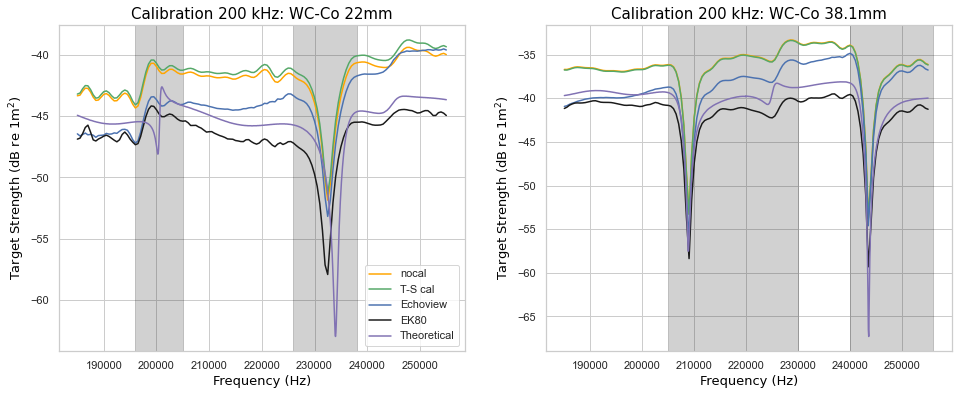

In [13]:
plt.figure(figsize=(16,6))
ax = plt.subplot(1,2,1)
plt.plot(nocal_22.freqs*1000, nocal_22.TS, 'orange' , label='nocal')
plt.plot(TScal_22.freqs*1000, TScal_22.TS, 'g' , label='T-S cal')
plt.plot(EVcal_22.freqs*1000, EVcal_22.TS, 'b' , label='Echoview')
plt.plot(EKcal_22.freqs*1000, EKcal_22.TS, 'k' , label='EK80')

ax.axvspan(band_200_22[0], band_200_22[1], color='k', alpha=0.2)
ax.axvspan(band_200_22_2[0], band_200_22_2[1], color='k', alpha=0.2)

plt.plot(freq_22, ts_22, 'm-' , label='Theoretical')
plt.title('Calibration 200 kHz: WC-Co 22mm',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)
plt.legend()


ax2 = plt.subplot(1,2,2)
plt.plot(nocal_38.freqs*1000, nocal_38.TS, 'orange' , label='nocal')
plt.plot(TScal_38.freqs*1000, TScal_38.TS, 'g' , label='T-S cal')
plt.plot(EVcal_38.freqs*1000, EVcal_38.TS, 'b' , label='Echoview')
plt.plot(EKcal_38.freqs*1000, EKcal_38.TS, 'k' , label='EK80')

ax2.axvspan(band_200_38[0], band_200_38[1], color='k', alpha=0.2)
ax2.axvspan(band_200_38_2[0], band_200_38_2[1], color='k', alpha=0.2)


plt.plot(freq_38, ts_38, 'm-' , label='Theoretical')
plt.title('Calibration 200 kHz: WC-Co 38.1mm',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)



**Verdict for 200 kHz calibration**: The EK80 calibration results in a better match with theoretical frequency response for both spheres. However it is not a particularly good calibration. 

I would favor the calibration results from:
- The 38.1 mm for the band <205 kHz. 
- The 22 mm sphere between 205 - 225 kHz. 
- The 38.1 mm sphere for 230 - 240 khz.
- The 22 mm sphere for > 240 kHz

The gap between 225 and 230 kHz will be linearly interpolated.

# Assess 120kHz calibration

### Theoretical response

In [14]:
freq_120_22 = [90000,90080,90160,90240,90320,90400,90480,90560,90640,90720,90800,90880,90960,91041,91121,91201,91281,91361,91441,91521,91601,91681,91761,91841,91921,92002,92082,92162,92242,92322,92402,92482,92562,92642,92722,92802,92882,92962,93043,93123,93203,93283,93363,93443,93523,93603,93683,93763,93843,93923,94004,94084,94164,94244,94324,94404,94484,94564,94644,94724,94804,94884,94964,95045,95125,95205,95285,95365,95445,95525,95605,95685,95765,95845,95925,96006,96086,96166,96246,96326,96406,96486,96566,96646,96726,96806,96886,96966,97047,97127,97207,97287,97367,97447,97527,97607,97687,97767,97847,97927,98008,98088,98168,98248,98328,98408,98488,98568,98648,98728,98808,98888,98968,99049,99129,99209,99289,99369,99449,99529,99609,99689,99769,99849,99929,100010,100090,100170,100250,100330,100410,100490,100570,100650,100730,100810,100890,100970,101051,101131,101211,101291,101371,101451,101531,101611,101691,101771,101851,101931,102012,102092,102172,102252,102332,102412,102492,102572,102652,102732,102812,102892,102972,103053,103133,103213,103293,103373,103453,103533,103613,103693,103773,103853,103933,104014,104094,104174,104254,104334,104414,104494,104574,104654,104734,104814,104894,104974,105055,105135,105215,105295,105375,105455,105535,105615,105695,105775,105855,105935,106016,106096,106176,106256,106336,106416,106496,106576,106656,106736,106816,106896,106976,107057,107137,107217,107297,107377,107457,107537,107617,107697,107777,107857,107937,108018,108098,108178,108258,108338,108418,108498,108578,108658,108738,108818,108898,108978,109059,109139,109219,109299,109379,109459,109539,109619,109699,109779,109859,109939,110020,110100,110180,110260,110340,110420,110500,110580,110660,110740,110820,110900,110980,111061,111141,111221,111301,111381,111461,111541,111621,111701,111781,111861,111941,112022,112102,112182,112262,112342,112422,112502,112582,112662,112742,112822,112902,112982,113063,113143,113223,113303,113383,113463,113543,113623,113703,113783,113863,113943,114024,114104,114184,114264,114344,114424,114504,114584,114664,114744,114824,114904,114984,115065,115145,115225,115305,115385,115465,115545,115625,115705,115785,115865,115945,116026,116106,116186,116266,116346,116426,116506,116586,116666,116746,116826,116906,116986,117067,117147,117227,117307,117387,117467,117547,117627,117707,117787,117867,117947,118028,118108,118188,118268,118348,118428,118508,118588,118668,118748,118828,118908,118988,119069,119149,119229,119309,119389,119469,119549,119629,119709,119789,119869,119949,120030,120110,120190,120270,120350,120430,120510,120590,120670,120750,120830,120910,120990,121071,121151,121231,121311,121391,121471,121551,121631,121711,121791,121871,121951,122032,122112,122192,122272,122352,122432,122512,122592,122672,122752,122832,122912,122992,123073,123153,123233,123313,123393,123473,123553,123633,123713,123793,123873,123953,124034,124114,124194,124274,124354,124434,124514,124594,124674,124754,124834,124914,124994,125075,125155,125235,125315,125395,125475,125555,125635,125715,125795,125875,125955,126036,126116,126196,126276,126356,126436,126516,126596,126676,126756,126836,126916,126996,127077,127157,127237,127317,127397,127477,127557,127637,127717,127797,127877,127957,128038,128118,128198,128278,128358,128438,128518,128598,128678,128758,128838,128918,128998,129079,129159,129239,129319,129399,129479,129559,129639,129719,129799,129879,129959,130040,130120,130200,130280,130360,130440,130520,130600,130680,130760,130840,130920,131001,131081,131161,131241,131321,131401,131481,131561,131641,131721,131801,131881,131961,132042,132122,132202,132282,132362,132442,132522,132602,132682,132762,132842,132922,133003,133083,133163,133243,133323,133403,133483,133563,133643,133723,133803,133883,133963,134044,134124,134204,134284,134364,134444,134524,134604,134684,134764,134844,134924,135005,135085,135165,135245,135325,135405,135485,135565,135645,135725,135805,135885,135965,136046,136126,136206,136286,136366,136446,136526,136606,136686,136766,136846,136926,137007,137087,137167,137247,137327,137407,137487,137567,137647,137727,137807,137887,137967,138048,138128,138208,138288,138368,138448,138528,138608,138688,138768,138848,138928,139009,139089,139169,139249,139329,139409,139489,139569,139649,139729,139809,139889,139969,140050,140130,140210,140290,140370,140450,140530,140610,140690,140770,140850,140930,141011,141091,141171,141251,141331,141411,141491,141571,141651,141731,141811,141891,141971,142052,142132,142212,142292,142372,142452,142532,142612,142692,142772,142852,142932,143013,143093,143173,143253,143333,143413,143493,143573,143653,143733,143813,143893,143973,144054,144134,144214,144294,144374,144454,144534,144614,144694,144774,144854,144934,145015,145095,145175,145255,145335,145415,145495,145575,145655,145735,145815,145895,145975,146056,146136,146216,146296,146376,146456,146536,146616,146696,146776,146856,146936,147017,147097,147177,147257,147337,147417,147497,147577,147657,147737,147817,147897,147977,148058,148138,148218,148298,148378,148458,148538,148618,148698,148778,148858,148938,149019,149099,149179,149259,149339,149419,149499,149579,149659,149739,149819,149899,149979,150060,150140,150220,150300,150380,150460,150540,150620,150700,150780,150860,150940,151021,151101,151181,151261,151341,151421,151501,151581,151661,151741,151821,151901,151981,152062,152142,152222,152302,152382,152462,152542,152622,152702,152782,152862,152942,153023,153103,153183,153263,153343,153423,153503,153583,153663,153743,153823,153903,153983,154064,154144,154224,154304,154384,154464,154544,154624,154704,154784,154864,154944,155025,155105,155185,155265,155345,155425,155505,155585,155665,155745,155825,155905,155985,156066,156146,156226,156306,156386,156466,156546,156626,156706,156786,156866,156946,157027,157107,157187,157267,157347,157427,157507,157587,157667,157747,157827,157907,157987,158068,158148,158228,158308,158388,158468,158548,158628,158708,158788,158868,158948,159029,159109,159189,159269,159349,159429,159509,159589,159669,159749,159829,159909,159989,160070,160150,160230,160310,160390,160470,160550,160630,160710,160790,160870,160950,161031,161111,161191,161271,161351,161431,161511,161591,161671,161751,161831,161911,161991,162072,162152,162232,162312,162392,162472,162552,162632,162712,162792,162872,162952,163033,163113,163193,163273,163353,163433,163513,163593,163673,163753,163833,163913,163993,164074,164154,164234,164314,164394,164474,164554,164634,164714,164794,164874,164954,165035,165115,165195,165275,165355,165435,165515,165595,165675,165755,165835,165915,165995,166076,166156,166236,166316,166396,166476,166556,166636,166716,166796,166876,166956,167037,167117,167197,167277,167357,167437,167517,167597,167677,167757,167837,167917,167997,168078,168158,168238,168318,168398,168478,168558,168638,168718,168798,168878,168958,169039,169119,169199,169279,169359,169439,169519,169599,169679,169759,169839,169919,170000]
ts_120_22 = [-46.62,-46.61,-46.61,-46.61,-46.60,-46.59,-46.59,-46.58,-46.57,-46.57,-46.56,-46.55,-46.54,-46.53,-46.52,-46.51,-46.49,-46.48,-46.47,-46.46,-46.44,-46.43,-46.42,-46.40,-46.39,-46.37,-46.35,-46.34,-46.32,-46.30,-46.29,-46.27,-46.25,-46.23,-46.21,-46.20,-46.18,-46.16,-46.14,-46.12,-46.10,-46.08,-46.06,-46.04,-46.01,-45.99,-45.97,-45.95,-45.93,-45.91,-45.89,-45.86,-45.84,-45.82,-45.80,-45.78,-45.75,-45.73,-45.71,-45.69,-45.66,-45.64,-45.62,-45.60,-45.58,-45.55,-45.53,-45.51,-45.49,-45.47,-45.44,-45.42,-45.40,-45.38,-45.36,-45.34,-45.31,-45.29,-45.27,-45.25,-45.23,-45.21,-45.19,-45.17,-45.15,-45.13,-45.11,-45.09,-45.07,-45.05,-45.03,-45.01,-45.00,-44.98,-44.96,-44.94,-44.92,-44.91,-44.89,-44.87,-44.86,-44.84,-44.82,-44.81,-44.79,-44.78,-44.76,-44.75,-44.73,-44.72,-44.70,-44.69,-44.68,-44.66,-44.65,-44.64,-44.63,-44.61,-44.60,-44.59,-44.58,-44.57,-44.56,-44.55,-44.54,-44.53,-44.52,-44.51,-44.50,-44.49,-44.49,-44.48,-44.47,-44.46,-44.46,-44.45,-44.44,-44.44,-44.43,-44.43,-44.42,-44.42,-44.41,-44.41,-44.41,-44.40,-44.40,-44.40,-44.40,-44.39,-44.39,-44.39,-44.39,-44.39,-44.39,-44.39,-44.39,-44.39,-44.39,-44.39,-44.40,-44.40,-44.40,-44.40,-44.41,-44.41,-44.41,-44.42,-44.42,-44.43,-44.43,-44.44,-44.44,-44.45,-44.45,-44.46,-44.47,-44.47,-44.48,-44.49,-44.50,-44.51,-44.51,-44.52,-44.53,-44.54,-44.55,-44.56,-44.57,-44.58,-44.59,-44.60,-44.62,-44.63,-44.64,-44.65,-44.66,-44.68,-44.69,-44.70,-44.72,-44.73,-44.74,-44.76,-44.77,-44.79,-44.80,-44.82,-44.83,-44.85,-44.86,-44.88,-44.90,-44.91,-44.93,-44.95,-44.96,-44.98,-45.00,-45.02,-45.03,-45.05,-45.07,-45.09,-45.11,-45.12,-45.14,-45.16,-45.18,-45.20,-45.22,-45.24,-45.26,-45.28,-45.30,-45.32,-45.34,-45.36,-45.38,-45.40,-45.42,-45.43,-45.45,-45.47,-45.49,-45.51,-45.53,-45.55,-45.57,-45.59,-45.61,-45.63,-45.65,-45.67,-45.69,-45.71,-45.73,-45.75,-45.77,-45.79,-45.81,-45.83,-45.85,-45.87,-45.88,-45.90,-45.92,-45.94,-45.96,-45.97,-45.99,-46.01,-46.03,-46.04,-46.06,-46.07,-46.09,-46.11,-46.12,-46.14,-46.15,-46.17,-46.18,-46.19,-46.21,-46.22,-46.23,-46.24,-46.26,-46.27,-46.28,-46.29,-46.30,-46.31,-46.32,-46.33,-46.34,-46.35,-46.35,-46.36,-46.37,-46.37,-46.38,-46.39,-46.39,-46.40,-46.40,-46.40,-46.41,-46.41,-46.41,-46.42,-46.42,-46.42,-46.42,-46.42,-46.42,-46.42,-46.42,-46.41,-46.41,-46.41,-46.41,-46.40,-46.40,-46.39,-46.39,-46.38,-46.38,-46.37,-46.37,-46.36,-46.35,-46.34,-46.33,-46.33,-46.32,-46.31,-46.30,-46.29,-46.28,-46.27,-46.25,-46.24,-46.23,-46.22,-46.21,-46.19,-46.18,-46.17,-46.15,-46.14,-46.12,-46.11,-46.09,-46.08,-46.06,-46.05,-46.03,-46.02,-46.00,-45.98,-45.97,-45.95,-45.93,-45.92,-45.90,-45.88,-45.87,-45.85,-45.83,-45.81,-45.80,-45.78,-45.76,-45.74,-45.72,-45.71,-45.69,-45.67,-45.65,-45.63,-45.62,-45.60,-45.58,-45.56,-45.54,-45.53,-45.51,-45.49,-45.47,-45.45,-45.44,-45.42,-45.40,-45.38,-45.37,-45.35,-45.33,-45.31,-45.30,-45.28,-45.26,-45.25,-45.23,-45.21,-45.20,-45.18,-45.17,-45.15,-45.14,-45.12,-45.10,-45.09,-45.08,-45.06,-45.05,-45.03,-45.02,-45.00,-44.99,-44.98,-44.96,-44.95,-44.94,-44.93,-44.91,-44.90,-44.89,-44.88,-44.87,-44.86,-44.85,-44.83,-44.82,-44.81,-44.80,-44.80,-44.79,-44.78,-44.77,-44.76,-44.75,-44.74,-44.74,-44.73,-44.72,-44.71,-44.71,-44.70,-44.70,-44.69,-44.68,-44.68,-44.67,-44.67,-44.66,-44.66,-44.66,-44.65,-44.65,-44.65,-44.64,-44.64,-44.64,-44.64,-44.64,-44.64,-44.63,-44.63,-44.63,-44.63,-44.63,-44.63,-44.64,-44.64,-44.64,-44.64,-44.64,-44.64,-44.65,-44.65,-44.65,-44.66,-44.66,-44.66,-44.67,-44.67,-44.68,-44.68,-44.69,-44.69,-44.70,-44.71,-44.71,-44.72,-44.73,-44.73,-44.74,-44.75,-44.76,-44.77,-44.77,-44.78,-44.79,-44.80,-44.81,-44.82,-44.83,-44.84,-44.85,-44.86,-44.87,-44.89,-44.90,-44.91,-44.92,-44.93,-44.95,-44.96,-44.97,-44.99,-45.00,-45.01,-45.03,-45.04,-45.06,-45.07,-45.08,-45.10,-45.11,-45.13,-45.15,-45.16,-45.18,-45.19,-45.21,-45.23,-45.24,-45.26,-45.28,-45.29,-45.31,-45.33,-45.34,-45.36,-45.38,-45.40,-45.41,-45.43,-45.45,-45.47,-45.49,-45.50,-45.52,-45.54,-45.56,-45.58,-45.60,-45.62,-45.63,-45.65,-45.67,-45.69,-45.71,-45.73,-45.75,-45.77,-45.79,-45.80,-45.82,-45.84,-45.86,-45.88,-45.90,-45.92,-45.93,-45.95,-45.97,-45.99,-46.01,-46.03,-46.04,-46.06,-46.08,-46.10,-46.11,-46.13,-46.15,-46.17,-46.18,-46.20,-46.22,-46.23,-46.25,-46.26,-46.28,-46.30,-46.31,-46.33,-46.34,-46.35,-46.37,-46.38,-46.40,-46.41,-46.42,-46.44,-46.45,-46.46,-46.47,-46.49,-46.50,-46.51,-46.52,-46.53,-46.54,-46.55,-46.56,-46.57,-46.58,-46.59,-46.59,-46.60,-46.61,-46.62,-46.62,-46.63,-46.64,-46.64,-46.65,-46.65,-46.66,-46.66,-46.66,-46.67,-46.67,-46.67,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.68,-46.67,-46.67,-46.67,-46.67,-46.66,-46.66,-46.65,-46.65,-46.64,-46.64,-46.63,-46.63,-46.62,-46.62,-46.61,-46.61,-46.60,-46.59,-46.58,-46.58,-46.57,-46.56,-46.55,-46.55,-46.54,-46.53,-46.52,-46.51,-46.50,-46.50,-46.49,-46.48,-46.47,-46.46,-46.45,-46.44,-46.43,-46.42,-46.41,-46.40,-46.39,-46.38,-46.37,-46.37,-46.36,-46.35,-46.34,-46.33,-46.32,-46.31,-46.30,-46.29,-46.28,-46.27,-46.26,-46.25,-46.24,-46.24,-46.23,-46.22,-46.21,-46.20,-46.19,-46.19,-46.18,-46.17,-46.16,-46.16,-46.15,-46.14,-46.14,-46.13,-46.12,-46.12,-46.11,-46.11,-46.10,-46.10,-46.09,-46.09,-46.09,-46.08,-46.08,-46.08,-46.07,-46.07,-46.07,-46.07,-46.07,-46.07,-46.07,-46.07,-46.07,-46.07,-46.07,-46.07,-46.07,-46.08,-46.08,-46.08,-46.09,-46.09,-46.10,-46.10,-46.11,-46.11,-46.12,-46.13,-46.14,-46.15,-46.16,-46.17,-46.18,-46.19,-46.20,-46.22,-46.23,-46.25,-46.26,-46.28,-46.29,-46.31,-46.33,-46.35,-46.37,-46.39,-46.42,-46.44,-46.47,-46.49,-46.52,-46.55,-46.58,-46.61,-46.64,-46.67,-46.71,-46.75,-46.79,-46.83,-46.87,-46.91,-46.96,-47.00,-47.05,-47.11,-47.16,-47.22,-47.28,-47.34,-47.40,-47.47,-47.54,-47.62,-47.70,-47.78,-47.86,-47.95,-48.05,-48.15,-48.26,-48.37,-48.49,-48.61,-48.75,-48.89,-49.04,-49.20,-49.37,-49.55,-49.75,-49.96,-50.18,-50.43,-50.69,-50.97,-51.28,-51.62,-51.99,-52.40,-52.85,-53.35,-53.91,-54.55,-55.27,-56.09,-57.05,-58.18,-59.54,-61.18,-63.21,-65.62,-67.80,-67.76,-65.30,-62.48,-60.03,-57.97,-56.23,-54.73,-53.42,-52.27,-51.24,-50.33,-49.51,-48.77,-48.11,-47.52,-46.99,-46.52,-46.10,-45.73,-45.40,-45.11,-44.86,-44.64,-44.44,-44.28,-44.14,-44.01,-43.91,-43.82,-43.75,-43.69,-43.64,-43.60,-43.57,-43.55,-43.53,-43.52,-43.51,-43.51,-43.51,-43.52,-43.52,-43.53,-43.55,-43.56,-43.58,-43.59,-43.61,-43.63,-43.65,-43.67,-43.69,-43.72,-43.74,-43.76,-43.78,-43.80,-43.83,-43.85,-43.87,-43.90,-43.92,-43.94,-43.96,-43.98,-44.01,-44.03,-44.05,-44.07,-44.09,-44.11,-44.13,-44.15,-44.17,-44.19,-44.21,-44.22,-44.24,-44.26,-44.28,-44.29,-44.31,-44.33,-44.34,-44.36,-44.37,-44.39,-44.40,-44.41,-44.43,-44.44,-44.45,-44.47,-44.48,-44.49,-44.50,-44.51,-44.52,-44.53,-44.54,-44.55,-44.56,-44.57,-44.57,-44.58,-44.59,-44.60,-44.60,-44.61,-44.61,-44.62,-44.62,-44.63,-44.63,-44.64,-44.64,-44.64,-44.65,-44.65,-44.65,-44.66,-44.66,-44.66,-44.66,-44.66,-44.66,-44.66,-44.66,-44.66,-44.66,-44.66,-44.66,-44.66,-44.65,-44.65,-44.65,-44.65,-44.65,-44.64,-44.64,-44.64,-44.63,-44.63,-44.63,-44.62,-44.62,-44.61,-44.61,-44.60,-44.60,-44.59,-44.59,-44.58,-44.58,-44.57]

In [15]:
freq_120_38 = [90000,90080,90160,90240,90320,90400,90480,90560,90640,90720,90800,90880,90960,91041,91121,91201,91281,91361,91441,91521,91601,91681,91761,91841,91921,92002,92082,92162,92242,92322,92402,92482,92562,92642,92722,92802,92882,92962,93043,93123,93203,93283,93363,93443,93523,93603,93683,93763,93843,93923,94004,94084,94164,94244,94324,94404,94484,94564,94644,94724,94804,94884,94964,95045,95125,95205,95285,95365,95445,95525,95605,95685,95765,95845,95925,96006,96086,96166,96246,96326,96406,96486,96566,96646,96726,96806,96886,96966,97047,97127,97207,97287,97367,97447,97527,97607,97687,97767,97847,97927,98008,98088,98168,98248,98328,98408,98488,98568,98648,98728,98808,98888,98968,99049,99129,99209,99289,99369,99449,99529,99609,99689,99769,99849,99929,100010,100090,100170,100250,100330,100410,100490,100570,100650,100730,100810,100890,100970,101051,101131,101211,101291,101371,101451,101531,101611,101691,101771,101851,101931,102012,102092,102172,102252,102332,102412,102492,102572,102652,102732,102812,102892,102972,103053,103133,103213,103293,103373,103453,103533,103613,103693,103773,103853,103933,104014,104094,104174,104254,104334,104414,104494,104574,104654,104734,104814,104894,104974,105055,105135,105215,105295,105375,105455,105535,105615,105695,105775,105855,105935,106016,106096,106176,106256,106336,106416,106496,106576,106656,106736,106816,106896,106976,107057,107137,107217,107297,107377,107457,107537,107617,107697,107777,107857,107937,108018,108098,108178,108258,108338,108418,108498,108578,108658,108738,108818,108898,108978,109059,109139,109219,109299,109379,109459,109539,109619,109699,109779,109859,109939,110020,110100,110180,110260,110340,110420,110500,110580,110660,110740,110820,110900,110980,111061,111141,111221,111301,111381,111461,111541,111621,111701,111781,111861,111941,112022,112102,112182,112262,112342,112422,112502,112582,112662,112742,112822,112902,112982,113063,113143,113223,113303,113383,113463,113543,113623,113703,113783,113863,113943,114024,114104,114184,114264,114344,114424,114504,114584,114664,114744,114824,114904,114984,115065,115145,115225,115305,115385,115465,115545,115625,115705,115785,115865,115945,116026,116106,116186,116266,116346,116426,116506,116586,116666,116746,116826,116906,116986,117067,117147,117227,117307,117387,117467,117547,117627,117707,117787,117867,117947,118028,118108,118188,118268,118348,118428,118508,118588,118668,118748,118828,118908,118988,119069,119149,119229,119309,119389,119469,119549,119629,119709,119789,119869,119949,120030,120110,120190,120270,120350,120430,120510,120590,120670,120750,120830,120910,120990,121071,121151,121231,121311,121391,121471,121551,121631,121711,121791,121871,121951,122032,122112,122192,122272,122352,122432,122512,122592,122672,122752,122832,122912,122992,123073,123153,123233,123313,123393,123473,123553,123633,123713,123793,123873,123953,124034,124114,124194,124274,124354,124434,124514,124594,124674,124754,124834,124914,124994,125075,125155,125235,125315,125395,125475,125555,125635,125715,125795,125875,125955,126036,126116,126196,126276,126356,126436,126516,126596,126676,126756,126836,126916,126996,127077,127157,127237,127317,127397,127477,127557,127637,127717,127797,127877,127957,128038,128118,128198,128278,128358,128438,128518,128598,128678,128758,128838,128918,128998,129079,129159,129239,129319,129399,129479,129559,129639,129719,129799,129879,129959,130040,130120,130200,130280,130360,130440,130520,130600,130680,130760,130840,130920,131001,131081,131161,131241,131321,131401,131481,131561,131641,131721,131801,131881,131961,132042,132122,132202,132282,132362,132442,132522,132602,132682,132762,132842,132922,133003,133083,133163,133243,133323,133403,133483,133563,133643,133723,133803,133883,133963,134044,134124,134204,134284,134364,134444,134524,134604,134684,134764,134844,134924,135005,135085,135165,135245,135325,135405,135485,135565,135645,135725,135805,135885,135965,136046,136126,136206,136286,136366,136446,136526,136606,136686,136766,136846,136926,137007,137087,137167,137247,137327,137407,137487,137567,137647,137727,137807,137887,137967,138048,138128,138208,138288,138368,138448,138528,138608,138688,138768,138848,138928,139009,139089,139169,139249,139329,139409,139489,139569,139649,139729,139809,139889,139969,140050,140130,140210,140290,140370,140450,140530,140610,140690,140770,140850,140930,141011,141091,141171,141251,141331,141411,141491,141571,141651,141731,141811,141891,141971,142052,142132,142212,142292,142372,142452,142532,142612,142692,142772,142852,142932,143013,143093,143173,143253,143333,143413,143493,143573,143653,143733,143813,143893,143973,144054,144134,144214,144294,144374,144454,144534,144614,144694,144774,144854,144934,145015,145095,145175,145255,145335,145415,145495,145575,145655,145735,145815,145895,145975,146056,146136,146216,146296,146376,146456,146536,146616,146696,146776,146856,146936,147017,147097,147177,147257,147337,147417,147497,147577,147657,147737,147817,147897,147977,148058,148138,148218,148298,148378,148458,148538,148618,148698,148778,148858,148938,149019,149099,149179,149259,149339,149419,149499,149579,149659,149739,149819,149899,149979,150060,150140,150220,150300,150380,150460,150540,150620,150700,150780,150860,150940,151021,151101,151181,151261,151341,151421,151501,151581,151661,151741,151821,151901,151981,152062,152142,152222,152302,152382,152462,152542,152622,152702,152782,152862,152942,153023,153103,153183,153263,153343,153423,153503,153583,153663,153743,153823,153903,153983,154064,154144,154224,154304,154384,154464,154544,154624,154704,154784,154864,154944,155025,155105,155185,155265,155345,155425,155505,155585,155665,155745,155825,155905,155985,156066,156146,156226,156306,156386,156466,156546,156626,156706,156786,156866,156946,157027,157107,157187,157267,157347,157427,157507,157587,157667,157747,157827,157907,157987,158068,158148,158228,158308,158388,158468,158548,158628,158708,158788,158868,158948,159029,159109,159189,159269,159349,159429,159509,159589,159669,159749,159829,159909,159989,160070,160150,160230,160310,160390,160470,160550,160630,160710,160790,160870,160950,161031,161111,161191,161271,161351,161431,161511,161591,161671,161751,161831,161911,161991,162072,162152,162232,162312,162392,162472,162552,162632,162712,162792,162872,162952,163033,163113,163193,163273,163353,163433,163513,163593,163673,163753,163833,163913,163993,164074,164154,164234,164314,164394,164474,164554,164634,164714,164794,164874,164954,165035,165115,165195,165275,165355,165435,165515,165595,165675,165755,165835,165915,165995,166076,166156,166236,166316,166396,166476,166556,166636,166716,166796,166876,166956,167037,167117,167197,167277,167357,167437,167517,167597,167677,167757,167837,167917,167997,168078,168158,168238,168318,168398,168478,168558,168638,168718,168798,168878,168958,169039,169119,169199,169279,169359,169439,169519,169599,169679,169759,169839,169919,170000]
ts_120_38 = [-45.07,-45.46,-45.90,-46.41,-46.99,-47.69,-48.51,-49.51,-50.75,-52.34,-54.46,-57.42,-61.48,-63.01,-58.48,-54.29,-51.17,-48.76,-46.82,-45.24,-43.92,-42.84,-41.94,-41.21,-40.62,-40.14,-39.77,-39.47,-39.25,-39.08,-38.95,-38.86,-38.80,-38.76,-38.74,-38.74,-38.74,-38.76,-38.78,-38.81,-38.84,-38.87,-38.91,-38.94,-38.98,-39.02,-39.06,-39.10,-39.14,-39.18,-39.22,-39.25,-39.29,-39.32,-39.36,-39.39,-39.43,-39.46,-39.49,-39.52,-39.55,-39.57,-39.60,-39.62,-39.65,-39.67,-39.69,-39.71,-39.73,-39.75,-39.77,-39.78,-39.80,-39.81,-39.82,-39.83,-39.84,-39.85,-39.86,-39.87,-39.87,-39.88,-39.88,-39.89,-39.89,-39.89,-39.89,-39.89,-39.89,-39.89,-39.88,-39.88,-39.88,-39.87,-39.87,-39.86,-39.85,-39.84,-39.84,-39.83,-39.82,-39.81,-39.80,-39.79,-39.78,-39.77,-39.76,-39.74,-39.73,-39.72,-39.71,-39.69,-39.68,-39.67,-39.66,-39.64,-39.63,-39.62,-39.60,-39.59,-39.58,-39.56,-39.55,-39.54,-39.53,-39.51,-39.50,-39.49,-39.48,-39.47,-39.46,-39.44,-39.43,-39.42,-39.41,-39.40,-39.39,-39.39,-39.38,-39.37,-39.36,-39.35,-39.35,-39.34,-39.34,-39.33,-39.32,-39.32,-39.32,-39.31,-39.31,-39.31,-39.31,-39.30,-39.30,-39.30,-39.30,-39.30,-39.31,-39.31,-39.31,-39.31,-39.32,-39.32,-39.33,-39.33,-39.34,-39.34,-39.35,-39.36,-39.37,-39.38,-39.39,-39.40,-39.41,-39.42,-39.43,-39.44,-39.45,-39.47,-39.48,-39.49,-39.51,-39.52,-39.54,-39.56,-39.57,-39.59,-39.61,-39.63,-39.64,-39.66,-39.68,-39.70,-39.72,-39.74,-39.76,-39.78,-39.81,-39.83,-39.85,-39.87,-39.89,-39.92,-39.94,-39.96,-39.99,-40.01,-40.03,-40.06,-40.08,-40.10,-40.13,-40.15,-40.18,-40.20,-40.22,-40.25,-40.27,-40.29,-40.32,-40.34,-40.36,-40.39,-40.41,-40.43,-40.45,-40.47,-40.50,-40.52,-40.54,-40.56,-40.58,-40.60,-40.62,-40.63,-40.65,-40.67,-40.69,-40.70,-40.72,-40.73,-40.75,-40.76,-40.77,-40.79,-40.80,-40.81,-40.82,-40.83,-40.84,-40.85,-40.85,-40.86,-40.87,-40.87,-40.88,-40.88,-40.89,-40.89,-40.89,-40.89,-40.89,-40.89,-40.89,-40.89,-40.89,-40.89,-40.89,-40.88,-40.88,-40.88,-40.87,-40.87,-40.86,-40.86,-40.85,-40.84,-40.84,-40.83,-40.83,-40.82,-40.81,-40.81,-40.80,-40.79,-40.79,-40.78,-40.78,-40.77,-40.77,-40.76,-40.76,-40.76,-40.76,-40.76,-40.76,-40.76,-40.77,-40.77,-40.78,-40.79,-40.80,-40.82,-40.84,-40.87,-40.90,-40.94,-40.98,-41.03,-41.10,-41.18,-41.27,-41.39,-41.53,-41.72,-41.95,-42.24,-42.61,-43.03,-43.37,-43.16,-41.77,-39.77,-38.41,-37.91,-37.86,-37.97,-38.12,-38.26,-38.39,-38.50,-38.59,-38.68,-38.75,-38.81,-38.86,-38.91,-38.96,-38.99,-39.03,-39.06,-39.09,-39.12,-39.14,-39.17,-39.19,-39.21,-39.23,-39.25,-39.27,-39.29,-39.31,-39.32,-39.34,-39.36,-39.38,-39.39,-39.41,-39.43,-39.44,-39.46,-39.48,-39.50,-39.52,-39.53,-39.55,-39.57,-39.59,-39.61,-39.63,-39.65,-39.67,-39.69,-39.71,-39.73,-39.75,-39.77,-39.79,-39.81,-39.83,-39.85,-39.87,-39.90,-39.92,-39.94,-39.96,-39.99,-40.01,-40.03,-40.06,-40.08,-40.10,-40.13,-40.15,-40.17,-40.20,-40.22,-40.24,-40.27,-40.29,-40.31,-40.34,-40.36,-40.38,-40.41,-40.43,-40.45,-40.47,-40.50,-40.52,-40.54,-40.56,-40.58,-40.60,-40.63,-40.65,-40.67,-40.68,-40.70,-40.72,-40.74,-40.76,-40.78,-40.79,-40.81,-40.83,-40.84,-40.86,-40.87,-40.88,-40.90,-40.91,-40.92,-40.93,-40.95,-40.96,-40.97,-40.98,-40.98,-40.99,-41.00,-41.01,-41.01,-41.02,-41.02,-41.03,-41.03,-41.04,-41.04,-41.04,-41.04,-41.05,-41.05,-41.05,-41.05,-41.05,-41.05,-41.05,-41.04,-41.04,-41.04,-41.04,-41.03,-41.03,-41.03,-41.02,-41.02,-41.02,-41.01,-41.01,-41.00,-41.00,-40.99,-40.99,-40.99,-40.98,-40.98,-40.97,-40.97,-40.96,-40.96,-40.96,-40.95,-40.95,-40.95,-40.94,-40.94,-40.94,-40.94,-40.94,-40.94,-40.94,-40.94,-40.94,-40.94,-40.94,-40.95,-40.95,-40.96,-40.96,-40.97,-40.98,-40.98,-40.99,-41.00,-41.02,-41.03,-41.04,-41.06,-41.08,-41.09,-41.11,-41.14,-41.16,-41.18,-41.21,-41.24,-41.27,-41.30,-41.34,-41.37,-41.41,-41.46,-41.50,-41.55,-41.60,-41.66,-41.72,-41.78,-41.85,-41.92,-42.00,-42.08,-42.17,-42.27,-42.37,-42.48,-42.60,-42.73,-42.87,-43.02,-43.18,-43.36,-43.56,-43.77,-44.01,-44.27,-44.56,-44.88,-45.23,-45.63,-46.08,-46.59,-47.18,-47.85,-48.63,-49.54,-50.62,-51.91,-53.46,-55.28,-57.20,-58.47,-57.92,-55.92,-53.64,-51.58,-49.82,-48.33,-47.06,-45.98,-45.05,-44.25,-43.57,-42.99,-42.48,-42.06,-41.69,-41.38,-41.11,-40.88,-40.69,-40.53,-40.39,-40.28,-40.18,-40.10,-40.03,-39.98,-39.93,-39.90,-39.87,-39.85,-39.83,-39.82,-39.81,-39.81,-39.80,-39.81,-39.81,-39.81,-39.82,-39.83,-39.84,-39.85,-39.86,-39.87,-39.89,-39.90,-39.91,-39.92,-39.94,-39.95,-39.96,-39.97,-39.99,-40.00,-40.01,-40.02,-40.02,-40.03,-40.03,-40.04,-40.03,-40.03,-40.02,-40.01,-40.00,-39.98,-39.96,-39.92,-39.89,-39.84,-39.79,-39.74,-39.67,-39.60,-39.53,-39.45,-39.37,-39.28,-39.20,-39.13,-39.05,-38.98,-38.92,-38.87,-38.82,-38.78,-38.75,-38.72,-38.70,-38.68,-38.67,-38.66,-38.66,-38.65,-38.65,-38.66,-38.66,-38.66,-38.66,-38.67,-38.67,-38.68,-38.68,-38.69,-38.69,-38.70,-38.70,-38.71,-38.71,-38.71,-38.72,-38.72,-38.72,-38.73,-38.73,-38.73,-38.73,-38.74,-38.74,-38.74,-38.74,-38.75,-38.75,-38.75,-38.75,-38.75,-38.76,-38.76,-38.76,-38.76,-38.77,-38.77,-38.77,-38.78,-38.78,-38.78,-38.79,-38.79,-38.79,-38.80,-38.80,-38.81,-38.81,-38.82,-38.82,-38.83,-38.83,-38.84,-38.85,-38.85,-38.86,-38.87,-38.87,-38.88,-38.89,-38.90,-38.91,-38.92,-38.93,-38.94,-38.95,-38.96,-38.97,-38.98,-38.99,-39.00,-39.01,-39.02,-39.04,-39.05,-39.06,-39.07,-39.09,-39.10,-39.11,-39.13,-39.14,-39.16,-39.17,-39.19,-39.20,-39.22,-39.23,-39.25,-39.26,-39.28,-39.29,-39.31,-39.32,-39.34,-39.36,-39.37,-39.39,-39.40,-39.42,-39.44,-39.45,-39.47,-39.48,-39.50,-39.52,-39.53,-39.55,-39.56,-39.58,-39.59,-39.61,-39.62,-39.64,-39.65,-39.67,-39.68,-39.70,-39.71,-39.72,-39.74,-39.75,-39.76,-39.77,-39.79,-39.80,-39.81,-39.82,-39.83,-39.84,-39.85,-39.86,-39.87,-39.88,-39.88,-39.89,-39.90,-39.90,-39.91,-39.92,-39.92,-39.93,-39.93,-39.93,-39.94,-39.94,-39.94,-39.94,-39.94,-39.95,-39.95,-39.95,-39.95,-39.94,-39.94,-39.94,-39.94,-39.94,-39.93,-39.93,-39.93,-39.92,-39.92,-39.91,-39.91,-39.90,-39.89,-39.89,-39.88,-39.87,-39.87,-39.86,-39.85,-39.84,-39.83,-39.82,-39.82,-39.81,-39.80,-39.79,-39.78,-39.77,-39.76,-39.75,-39.74,-39.73,-39.72,-39.71,-39.70,-39.69,-39.68,-39.67,-39.66,-39.65,-39.64,-39.63,-39.62,-39.61,-39.60,-39.59,-39.58,-39.57,-39.56,-39.55,-39.54,-39.53,-39.52,-39.52,-39.51,-39.50,-39.49,-39.49,-39.48,-39.47,-39.47,-39.46,-39.46,-39.45,-39.45,-39.44,-39.44,-39.43,-39.43,-39.43,-39.42,-39.42,-39.42,-39.42,-39.42,-39.42,-39.42,-39.42,-39.42,-39.42,-39.42,-39.42,-39.42,-39.43,-39.43,-39.44,-39.44,-39.44,-39.45,-39.46,-39.46,-39.47,-39.48,-39.49,-39.49,-39.50,-39.51,-39.53,-39.54,-39.55,-39.56,-39.58,-39.59,-39.61,-39.63,-39.64,-39.66,-39.69,-39.71,-39.73,-39.76,-39.79,-39.83,-39.87,-39.92,-39.97,-40.04,-40.13,-40.25,-40.42,-40.71,-41.26,-42.74,-45.75,-38.62,-38.66,-38.93,-39.12,-39.25,-39.35,-39.43,-39.49,-39.54,-39.59,-39.63,-39.67,-39.71,-39.74,-39.77,-39.80,-39.83,-39.86,-39.89,-39.91,-39.94,-39.97,-39.99,-40.02,-40.04,-40.06,-40.09,-40.11,-40.14,-40.16,-40.19,-40.21,-40.23,-40.26,-40.28,-40.31,-40.33,-40.36,-40.38,-40.41,-40.44,-40.46,-40.49,-40.52,-40.54,-40.57,-40.60,-40.63,-40.66,-40.69,-40.72,-40.76,-40.79,-40.83,-40.86,-40.90,-40.94,-40.98,-41.03,-41.07,-41.12,-41.17,-41.23]

In [16]:
# Inhibition bands
band_120_22 = [152000,170000]

band_120_38_1 = [90000,100000]
band_120_38_2 = [110000,118000]
band_120_38_3 = [130000,143000]
band_120_38_4 = [163000,170000]

### Wideband frequency responses from Echoview

In [17]:
EKcal_120_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EK_120_TScal_beamcal_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
TScal_120_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EV_120_TScal_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EVcal_120_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EV_120_TScal_beamcal_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
nocal_120_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EV_120_nocal_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

In [18]:
EKcal_120_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EK_120_TScal_beamcal_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
TScal_120_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EV_120_TScal_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EVcal_120_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EV_120_TScal_beamcal_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
nocal_120_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EV_120_nocal_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

### Plot

Text(0.5, 0, 'Frequency (Hz)')

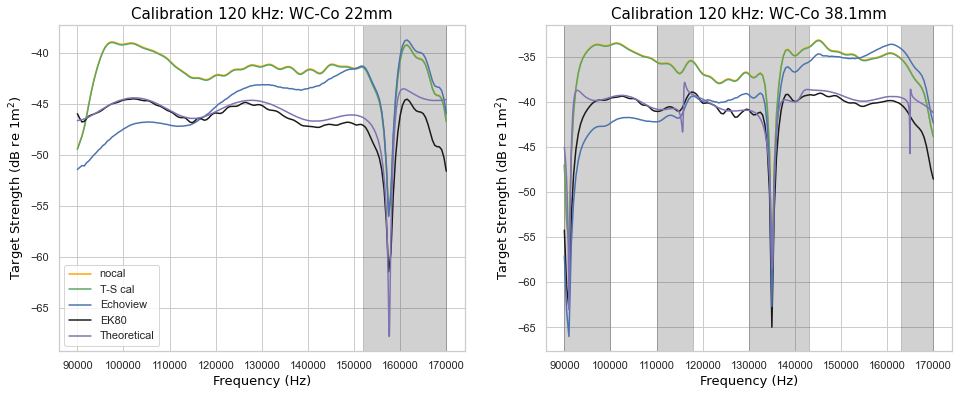

In [19]:
plt.figure(figsize=(16,6))
ax = plt.subplot(1,2,1)
# plot calibrations
plt.plot(nocal_120_22.freqs*1000, nocal_120_22.TS, 'orange' , label='nocal')
plt.plot(TScal_120_22.freqs*1000, TScal_120_22.TS, 'g' , label='T-S cal')
plt.plot(EVcal_120_22.freqs*1000, EVcal_120_22.TS, 'b' , label='Echoview')
plt.plot(EKcal_120_22.freqs*1000, EKcal_120_22.TS, 'k' , label='EK80')

# plot inhibition bands
ax.axvspan(band_120_22[0], band_120_22[1], color='k', alpha=0.2)

# plot theoretic
plt.plot(freq_120_22, ts_120_22, 'm-' , label='Theoretical')
plt.title('Calibration 120 kHz: WC-Co 22mm',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)
plt.legend()

ax2 = plt.subplot(1,2,2)
plt.plot(nocal_120_38.freqs*1000, nocal_120_38.TS, 'orange' , label='nocal')
plt.plot(TScal_120_38.freqs*1000, TScal_120_38.TS, 'g' , label='T-S cal')
plt.plot(EKcal_120_38.freqs*1000, EKcal_120_38.TS, 'k' , label='EK80')
plt.plot(EVcal_120_38.freqs*1000, EVcal_120_38.TS, 'b' , label='Echoview')

ax2.axvspan(band_120_38_1[0], band_120_38_1[1], color='k', alpha=0.2)
ax2.axvspan(band_120_38_2[0], band_120_38_2[1], color='k', alpha=0.2)
ax2.axvspan(band_120_38_3[0], band_120_38_3[1], color='k', alpha=0.2)
ax2.axvspan(band_120_38_4[0], band_120_38_4[1], color='k', alpha=0.2)

plt.plot(freq_120_38, ts_120_38, 'm-' , label='Theoretical')
plt.title('Calibration 120 kHz: WC-Co 38.1mm',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)


**Verdict for 120 kHz calibration**: The EK80 calibration results in a better match with theoretical frequency response for both spheres. I am very satisfied with with calibration. However, we keep in consideration the calibration results from the frequency band 90-97 kHz with highly variable gain and *will not include any frequency response < 97 kHz in any analysis* with this particular 120 kHz transducer.

I would favor the calibration results from:
- The 22 mm for the band <150 kHz. 
- The 38.1 mm sphere for >150 khz.


The gap between 163 and 170 kHz will be linearly interpolated. Actually, I will consider not using this frequency band as well, nothing to interpolate with and unreliable response..?

# Combine spheres

## 200 kHz

In [47]:
freq_200_combined = [185000,185980,186961,187942,188923,189904,190885,191866,192847,193828,194809,195790,196771,197752,198733,199714,200695,201676,202657,203638,204619,205600,206581,207562,208543,209524,210505,211486,212467,213448,214429,215410,216391,217372,218353,219334,220315,221296,222277,223258,224239,230125,231106,232087,233068,234049,235030,236011,236991,237972,238953,239934,240915,241896,242877,243858,244839,245820,246801,247782,248763,249744,250725,251706,252687,253668,254649,255000]
gain_200_combined = [26.67,26.58,26.62,26.71,26.70,26.67,26.63,26.65,26.68,26.74,26.83,26.90,27.02,27.11,27.25,27.33,27.31,27.47,27.46,27.58,27.69,27.39,27.67,27.61,27.67,27.91,27.90,28.03,28.19,28.34,28.30,28.44,28.70,28.62,28.72,28.94,28.96,29.03,28.73,28.23,28.91,29.81,29.73,29.67,29.79,29.81,29.81,29.77,29.72,29.73,29.64,29.64,29.72,29.70,29.70,29.56,29.49,29.63,29.88,30.05,30.05,30.06,30.04,30.03,30.13,30.00,30.09,30.13]

In [59]:
EKcal_200_combo_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EK_200_TScal_combined_22mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EKcal_200_combo_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EK_200_TScal_combined_38mm.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

Text(0.5, 0, 'Frequency (Hz)')

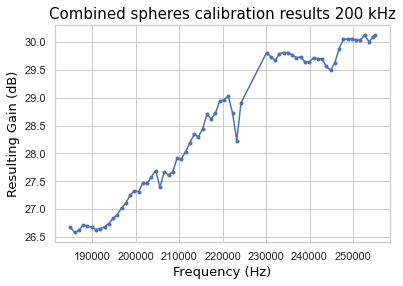

In [65]:
plt.plot(freq_200_combined, gain_200_combined, '.-')
plt.title('Combined spheres calibration results 200 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

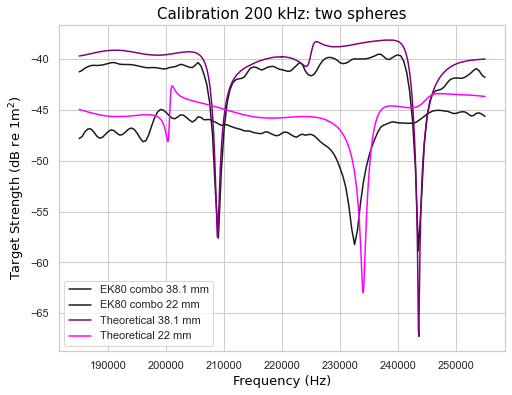

In [61]:
plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
# plot calibrations
plt.plot(EKcal_200_combo_38.freqs*1000, EKcal_200_combo_38.TS, 'k' , label='EK80 combo 38.1 mm')
plt.plot(EKcal_200_combo_22.freqs*1000, EKcal_200_combo_22.TS, 'k' , label='EK80 combo 22 mm')


# plot theoretic
plt.plot(freq_38, ts_38, 'purple' , label='Theoretical 38.1 mm')
plt.plot(freq_22, ts_22, 'magenta' , label='Theoretical 22 mm')
plt.title('Calibration 200 kHz: two spheres',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)
plt.legend()

## 120 kHz

In [22]:
freq_120_combined = [90000,90480,90960,91441,91921,92402,92882,93363,93843,94324,94804,95285,95765,96246,96726,97207,97687,98168,98648,99129,99609,100090,100570,101051,101531,102012,102492,102972,103453,103933,104414,104894,105375,105855,106336,106816,107297,107777,108258,108738,109219,109699,110180,110660,111141,111621,112102,112582,113063,113543,114024,114504,114984,115465,115945,116426,116906,117387,117867,118348,118828,119309,119789,120270,120750,121231,121711,122192,122672,123153,123633,124114,124594,125075,125555,126036,126516,126996,127477,127957,128438,128918,129399,129879,130360,130840,131321,131801,132282,132762,133243,133723,134204,134684,135165,135645,136126,136606,137087,137567,138048,138528,139009,139489,139969,140450,140930,141411,141891,142372,142852,143333,143813,144294,144774,145255,145735,146216,146696,147177,147657,148138,148618,149099,149579,150060,150540,151021,151501,151981,152462,152942,153423,153903,154384,154864,155345,155825,156306,156786,157267,157747,158228,158708,159189,159669,160150,160630,161111,161591,162072,162552]
gain_120_combined = [20.77,21.36,21.91,22.36,22.78,23.28,23.83,24.36,24.80,25.21,25.54,25.84,26.05,26.21,26.30,26.34,26.34,26.34,26.33,26.32,26.36,26.44,26.55,26.64,26.70,26.70,26.68,26.66,26.65,26.65,26.64,26.62,26.62,26.67,26.73,26.77,26.78,26.78,26.82,26.87,26.92,26.90,26.87,26.85,26.86,26.90,26.90,26.85,26.78,26.77,26.81,26.86,26.87,26.83,26.78,26.79,26.85,26.92,26.94,26.94,26.92,26.94,26.99,27.07,27.11,27.09,27.00,26.91,26.89,26.96,27.07,27.15,27.20,27.18,27.14,27.16,27.25,27.39,27.52,27.60,27.60,27.57,27.56,27.61,27.73,27.88,28.00,28.08,28.09,28.07,28.05,28.08,28.20,28.37,28.53,28.63,28.70,28.71,28.70,28.69,28.71,28.80,28.93,29.07,29.18,29.25,29.28,29.28,29.29,29.29,29.31,29.36,29.45,29.56,29.68,29.74,29.76,29.74,29.71,29.70,29.69,29.67,29.66,29.68,29.71,29.54,29.61,29.69,29.76,29.81,29.82,29.80,29.78,29.78,29.78,29.80,29.78,29.78,29.81,29.83,29.87,29.90,29.94,29.99,30.04,30.09,30.14,30.17,30.20,30.19,30.19,30.18]

In [33]:
EKcal_120_combo_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EK_120_TScal_combinespheres.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EKcal_120_combo_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/120kHz/EK_120_TScal_combinespheres_22.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

Text(0.5, 0, 'Frequency (Hz)')

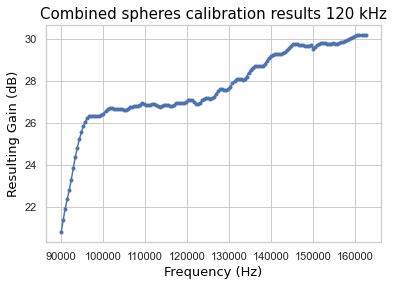

In [66]:
plt.plot(freq_120_combined, gain_120_combined, '.-')
plt.title('Combined spheres calibration results 120 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

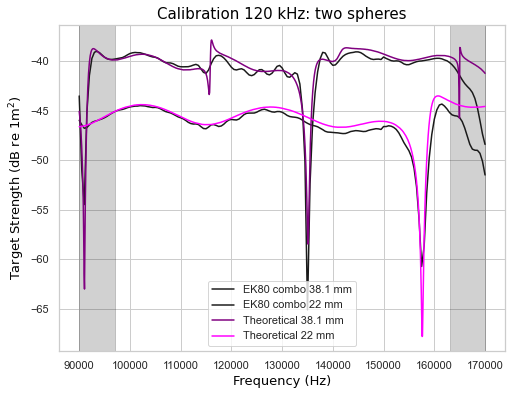

In [56]:
plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
# plot calibrations
plt.plot(EKcal_120_combo_38.freqs*1000, EKcal_120_combo_38.TS, 'k' , label='EK80 combo 38.1 mm')
plt.plot(EKcal_120_combo_22.freqs*1000, EKcal_120_combo_22.TS, 'k' , label='EK80 combo 22 mm')

# plot inhibition bands
ax.axvspan(90000, 97000, color='k', alpha=0.2)
ax.axvspan(163000, 170000, color='k', alpha=0.2)

# plot theoretic
plt.plot(freq_120_38, ts_120_38, 'purple' , label='Theoretical 38.1 mm')
plt.plot(freq_120_22, ts_120_22, 'magenta' , label='Theoretical 22 mm')
plt.title('Calibration 120 kHz: two spheres',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)
plt.legend()